# Data Exploration and Enrichment for Supervised Classification
In this project, we will work with the Hepatocellular Carcinoma (HCC) dataset obtained from the
Coimbra Hospital and University Center (CHUC) in Portugal. This dataset contains real clinical data of
patients diagnosed with HCC.

Our primary objective is to develop a machine learning pipeline to predict the survivability of patients at
1 year after diagnosis, distinguishing between "lives" or "dies" outcomes.

To achieve this goal, we will follow a structured approach covering all stages of a typical data science
pipeline. This includes initial data exploration to understand the dataset's characteristics, preprocessing
to handle missing values and feature engineering, supervised learning model development using
algorithms like Decision Trees and KNN, evaluation of model performance using various metrics, and
interpretation of results to extract meaningful insights and recommendations for future analysis.

- [Go to Bibliography](#bibliography);
- [Go to Data Exploration](#data-exploration);
- [Go to Data Preprocessing](#data-preprocessing);
- [Go to Conclusion](#conclusion);

<a id="bibliography"></a>
## Bibliography
1. EASL Clinical Practice Guidelines: Management of hepatocellular carcinoma. Journal of 
Hepatology — The home of liver research. https://socgastro.org.br/novo/wpcontent/uploads/2021/01/easl-easl-guidelines-management-of-hepatocellular-carcinoma.pdf

3. Santos, M. et al. “A new cluster-based oversampling method for improving survival prediction of 
hepatocellular carcinoma patients.” Journal of biomedical informatics 58 (2015): 49-59 https://www.sciencedirect.com/science/article/pii/S1532046415002063
  
3. Chicco, D. et al. “Computational intelligence identifies alkaline phosphatase (ALP), alpha
fetoprotein (AFP), and hemoglobin levels as most predictive survival factors for hepatocellular 
carcinoma.” Health Informatics Journal 27.1 
(2021). https://journals.sagepub.com/doi/10.1177/1460458220984205

<a id="data-exploration"></a>
## Data Exploration

In [690]:
import pandas as pd
import numpy as np 

df = pd.read_csv(r'hcc_dataset.csv')


Immediately, we notice the data set is made out of many parameters that can be implemented into the models we're going to build.

However, not all of this data is properly set up. There are many columns in which the data is incomplete (they have question marks in it), we need to determine if those columns are fit to use and to transform it so the decision trees and the KNN models can work with.
Something we also need to have into consideration is the parameters' relevance into the patient's survivavility. We are going to explore this in more detail with some of the guidelines stated in the papers stated [here](#bibliography).

But first, let's explore.

In [691]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        165 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           165 non-null    object
 4   HBeAg           165 non-null    object
 5   HBcAb           165 non-null    object
 6   HCVAb           165 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         165 non-null    object
 9   Smoking         165 non-null    object
 10  Diabetes        165 non-null    object
 11  Obesity         165 non-null    object
 12  Hemochro        165 non-null    object
 13  AHT             165 non-null    object
 14  CRI             165 non-null    object
 15  HIV             165 non-null    object
 16  NASH            165 non-null    object
 17  Varices         165 non-null    object
 18  Spleno    

In [692]:
sub_set = df[['Encephalopathy', 'Ascites']]
sub_set.describe()

,Encephalopathy,Ascites
count,23,56
unique,3,3
top,Grade I/II,Mild
freq,18,36


In [693]:
sub_set['Encephalopathy'].unique()

array([nan, 'Grade I/II', '?', 'Grade III/IV'], dtype=object)

In [694]:
print(sub_set)

    Encephalopathy Ascites
0              NaN     NaN
1              NaN     NaN
2              NaN    Mild
3              NaN     NaN
4              NaN     NaN
..             ...     ...
160            NaN     NaN
161            NaN     NaN
162            NaN     NaN
163            NaN     NaN
164            NaN     NaN

[165 rows x 2 columns]


Now that we know these columns have values that aren't being recognized, let's map them already.

In [695]:
df_graph = df.copy()
# Mapping dictionary
mapping = {'?': 0, np.nan: 0, "Grade I/II": 1, "Grade III/IV": 2, "Mild": 1, "Moderate/Severe": 2}

# Apply mapping
df_graph['Encephalopathy'] = df_graph['Encephalopathy'].map(mapping)
df_graph['Ascites'] = df_graph['Ascites'].map(mapping)

# Display the DataFrame
print(df_graph[['Encephalopathy', 'Ascites']])

     Encephalopathy  Ascites
0                 0        0
1                 0        0
2                 0        1
3                 0        0
4                 0        0
..              ...      ...
160               0        0
161               0        0
162               0        0
163               0        0
164               0        0

[165 rows x 2 columns]


There're still columns in the dataframe with NaN values (as we can see bellow), but those are easier to map and are more consistent, so we will take care of them in the data preprocessing stage ([here](#data-preprocessing)).

In [696]:
df.describe(include = 'all')

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
count,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
unique,2,3,2,3,3,3,3,2,3,3,...,125,47,85,7,69,42,69,58,85,2
top,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,109,7.3,0.7,1,?,?,?,?,?,Lives
freq,133,94,122,132,125,103,122,149,116,63,...,5,12,11,67,20,44,79,80,80,102
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's see the age and sex distributions as well as some important enzimes by age.

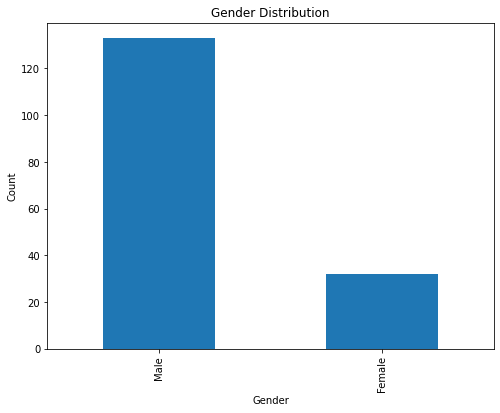

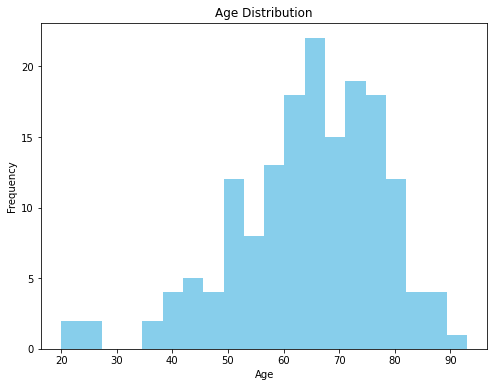

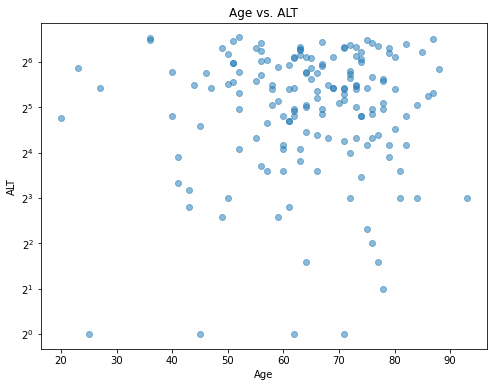

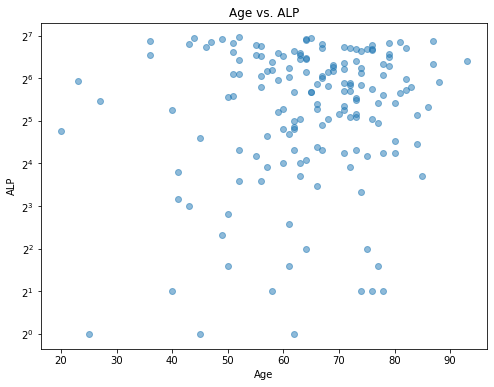

In [697]:
import matplotlib.pyplot as plt

# Bar plot of Gender distribution
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Histogram of Age
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of Age vs. ALT (Alanine transaminase)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['ALT'], alpha=0.5)
plt.title('Age vs. ALT')
plt.xlabel('Age')
plt.ylabel('ALT')
plt.yscale('log', base=2)
plt.show()

# Scatter plot of Age vs. ALP (Alanine Phosphatase)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['ALP'], alpha=0.5)
plt.title('Age vs. ALP')
plt.xlabel('Age')
plt.ylabel('ALP')
plt.yscale('log', base=2)
plt.show()

With these graphs, we can conclude that male is the prominent sex in this dataset and that most of the patients are age 50 or above. 
About these enzimes (ALT and ALP), most of the patients seem to have high concentration across all ages.

Let's see alcohol and smoke consumption.

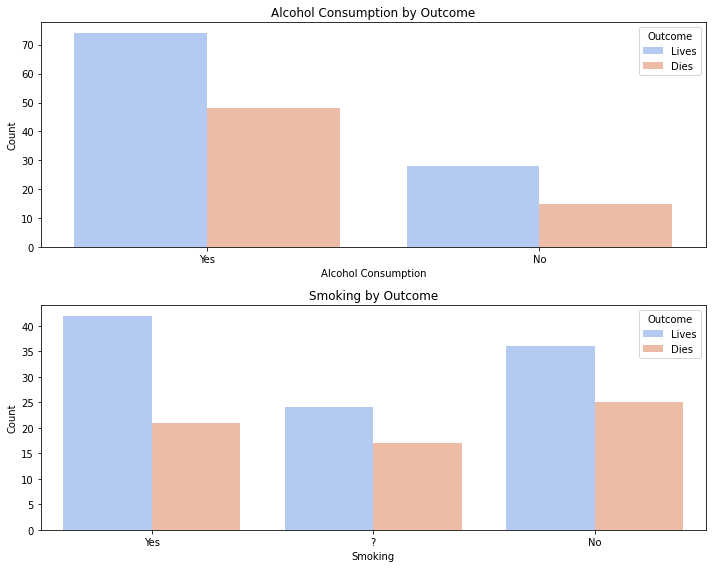

In [698]:
import seaborn as sns

# Create a grouped bar plot for alcohol consumption and smoking by outcome
plt.figure(figsize=(10, 8))

# Grouped bar plot for alcohol consumption by outcome
plt.subplot(2, 1, 1)
sns.countplot(data=df, x='Alcohol', hue='Class', palette='coolwarm')
plt.title('Alcohol Consumption by Outcome')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.legend(title='Outcome')

# Grouped bar plot for smoking by outcome
plt.subplot(2, 1, 2)
sns.countplot(data=df, x='Smoking', hue='Class', palette='coolwarm')
plt.title('Smoking by Outcome')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Outcome')

plt.tight_layout()
plt.show()

The Alcohol Consumption graph displays an important information about our patients. The death rate of alcohol consumption seems to be slightly higher compared with those that don't consume, but we don't have a large amount of data to confirm that trend. However, that might be something to keep an eye on.

A curious fact is that there's a lower death rate in those who smoke rather than in those who don't smoke, but we have to keep in mind that there is a large amount of patients which we don't have data on, so this might be a parameter we might want to discard.

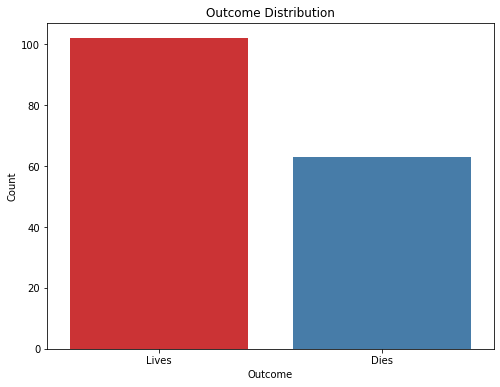

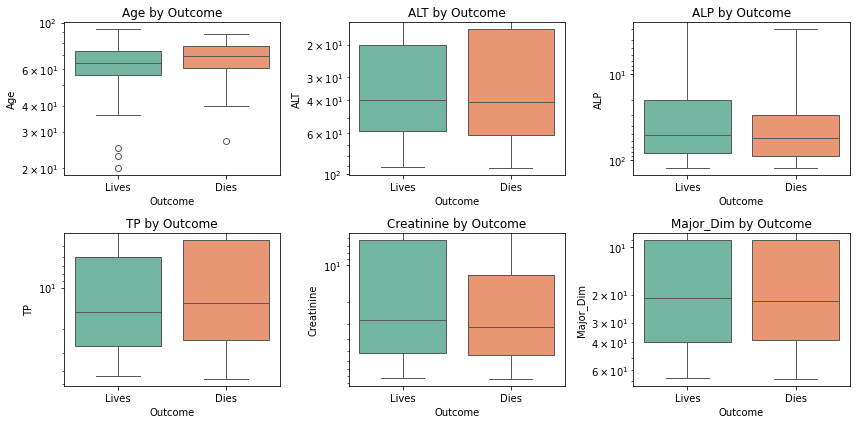

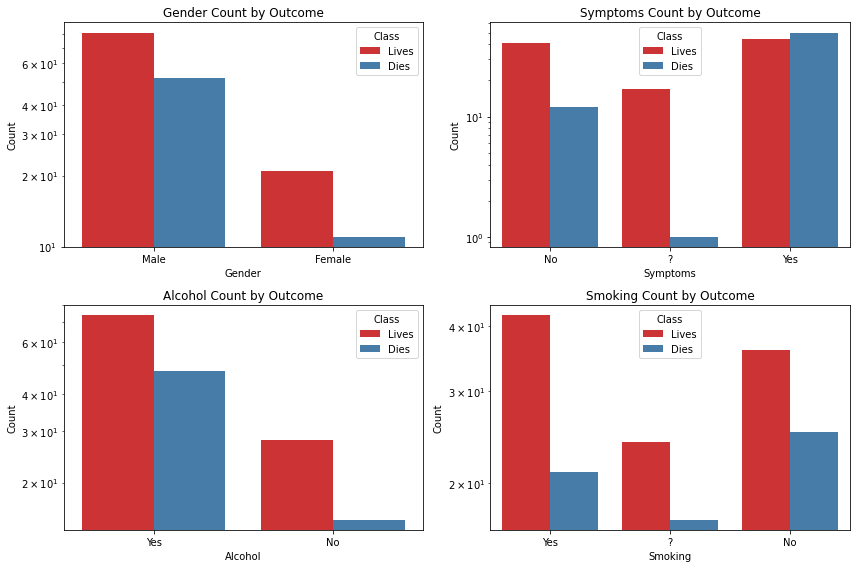

Age - Shapiro-Wilk Test Statistic: 0.9636332988739014
Age - Shapiro-Wilk p-value: 0.00025714613730087876
Age - Kolmogorov-Smirnov Test Statistic: 1.0
Age - Kolmogorov-Smirnov p-value: 0.0


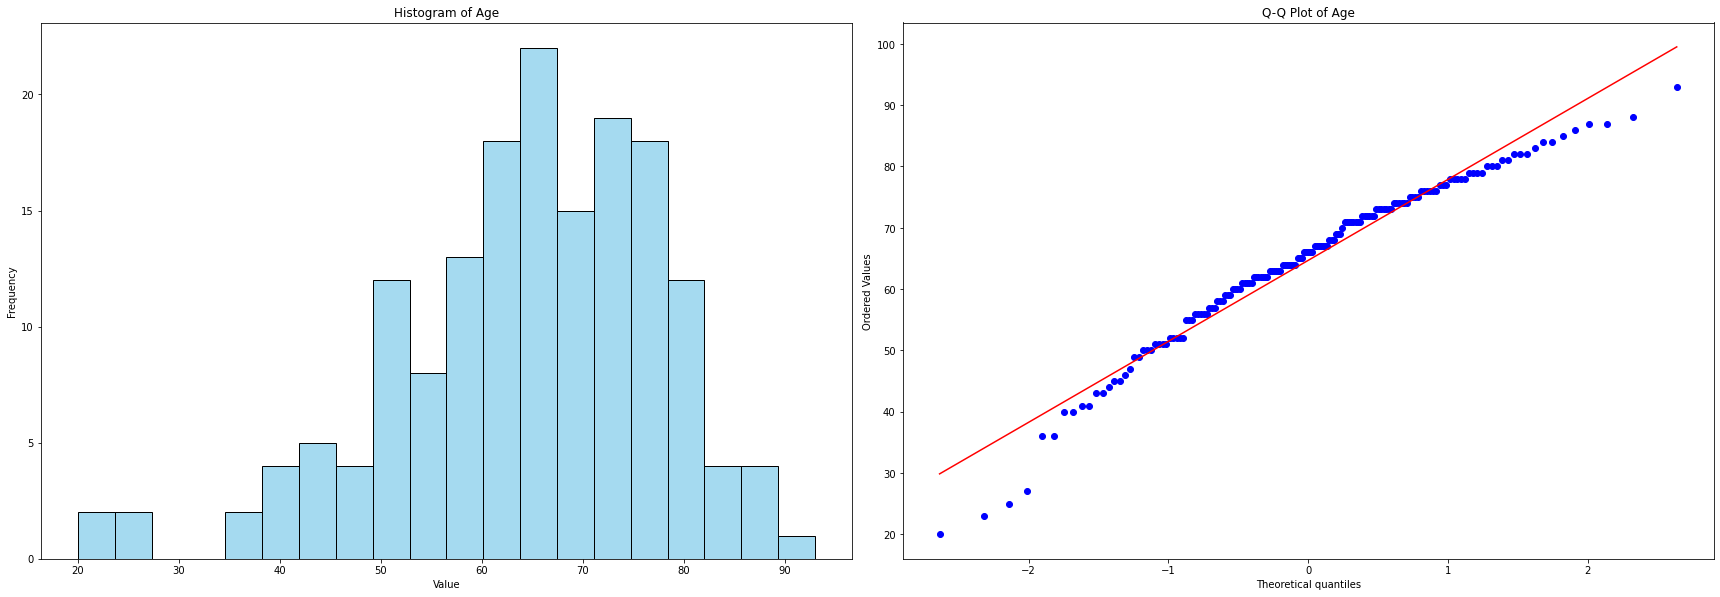

ALT - Shapiro-Wilk Test Statistic: 0.7440820336341858
ALT - Shapiro-Wilk p-value: 1.2002888849396535e-15
ALT - Kolmogorov-Smirnov Test Statistic: 1.0
ALT - Kolmogorov-Smirnov p-value: 0.0


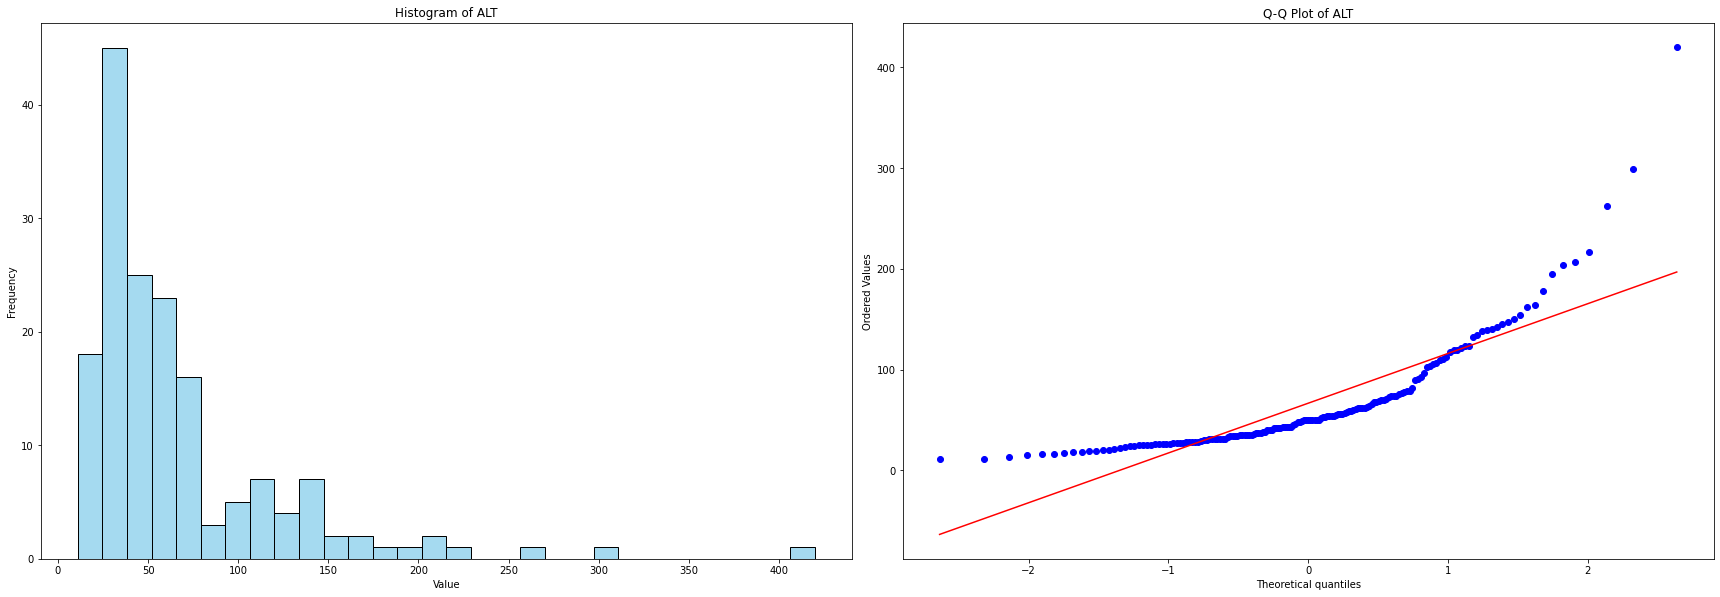

ALP - Shapiro-Wilk Test Statistic: 0.753985583782196
ALP - Shapiro-Wilk p-value: 2.463616291154577e-15
ALP - Kolmogorov-Smirnov Test Statistic: 0.9939393939393939
ALP - Kolmogorov-Smirnov p-value: 0.0


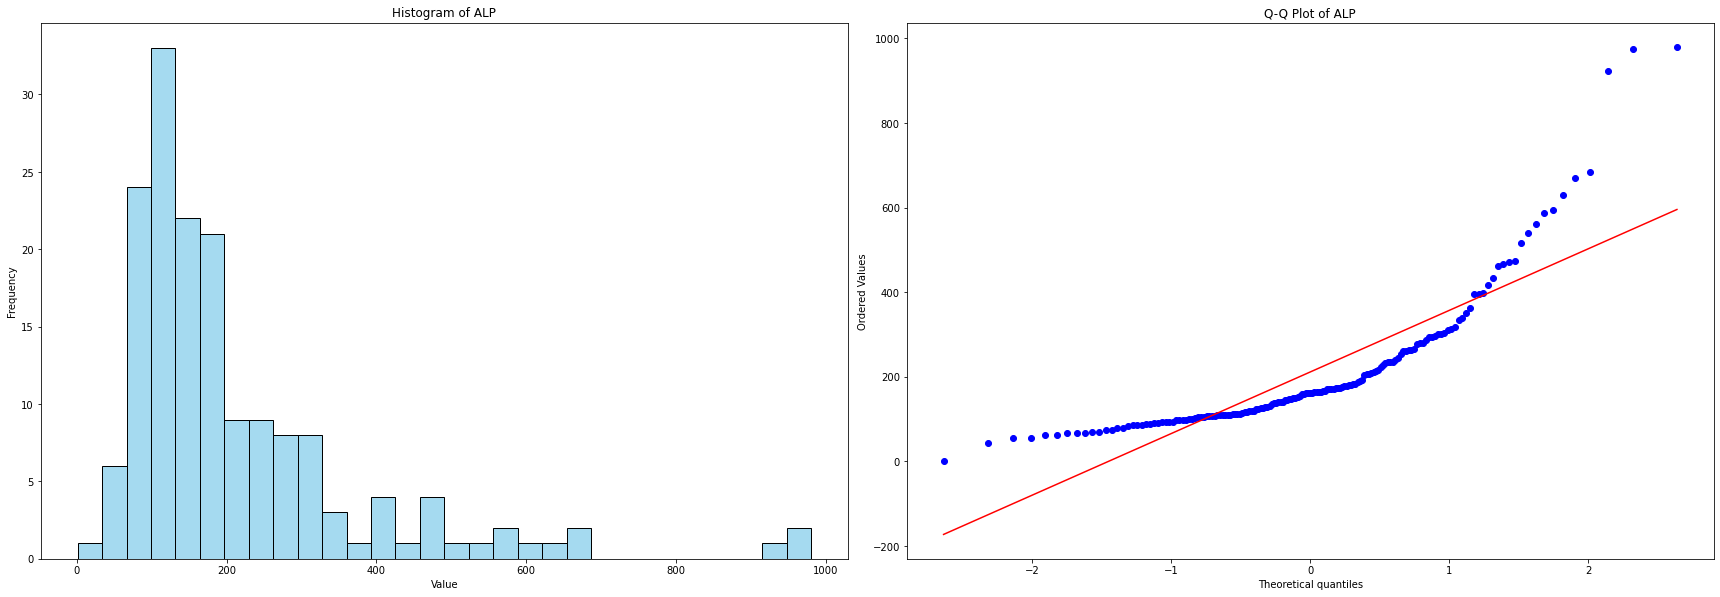

TP - Shapiro-Wilk Test Statistic: 0.22620439529418945
TP - Shapiro-Wilk p-value: 8.181235156109106e-26
TP - Kolmogorov-Smirnov Test Statistic: 0.9999519036559824
TP - Kolmogorov-Smirnov p-value: 0.0


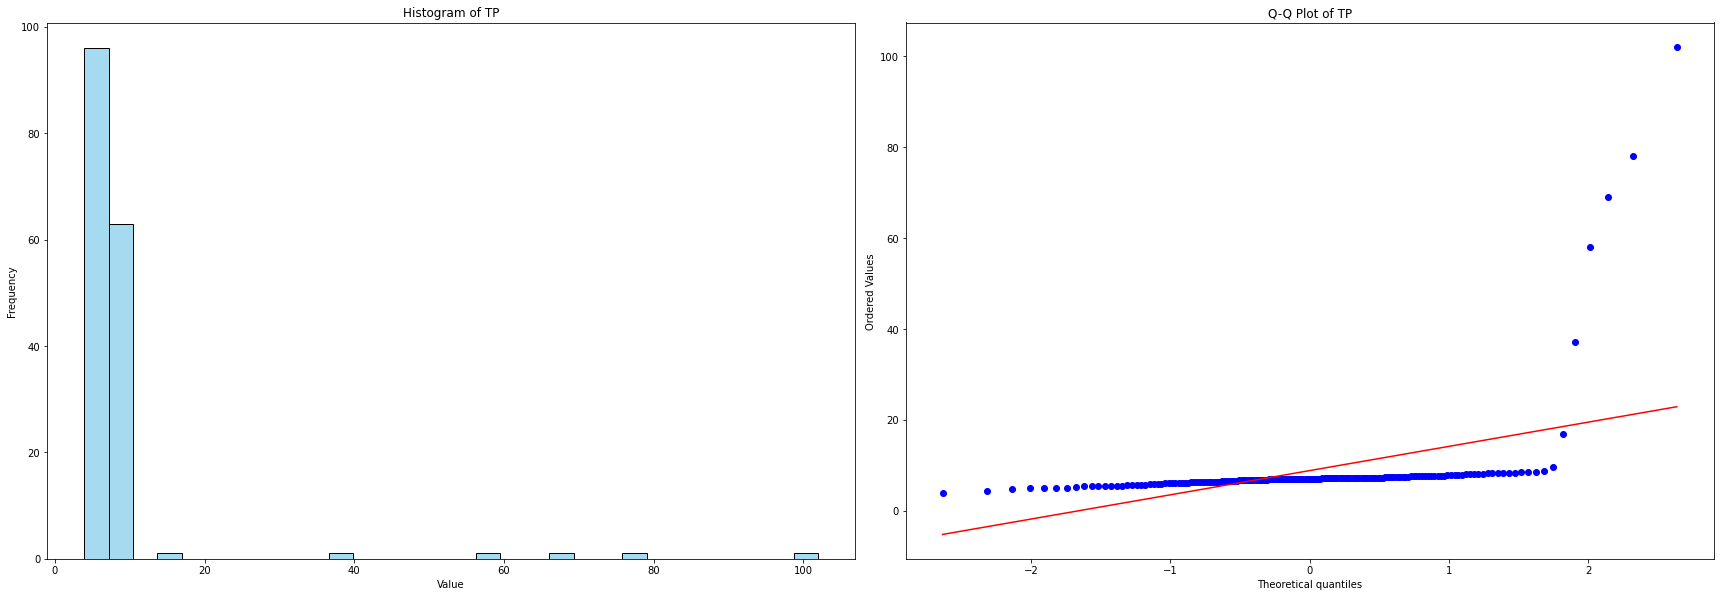

Creatinine - Shapiro-Wilk Test Statistic: 0.5326825976371765
Creatinine - Shapiro-Wilk p-value: 7.673193933918977e-21
Creatinine - Kolmogorov-Smirnov Test Statistic: 0.6681651821500035
Creatinine - Kolmogorov-Smirnov p-value: 3.982318748561648e-73


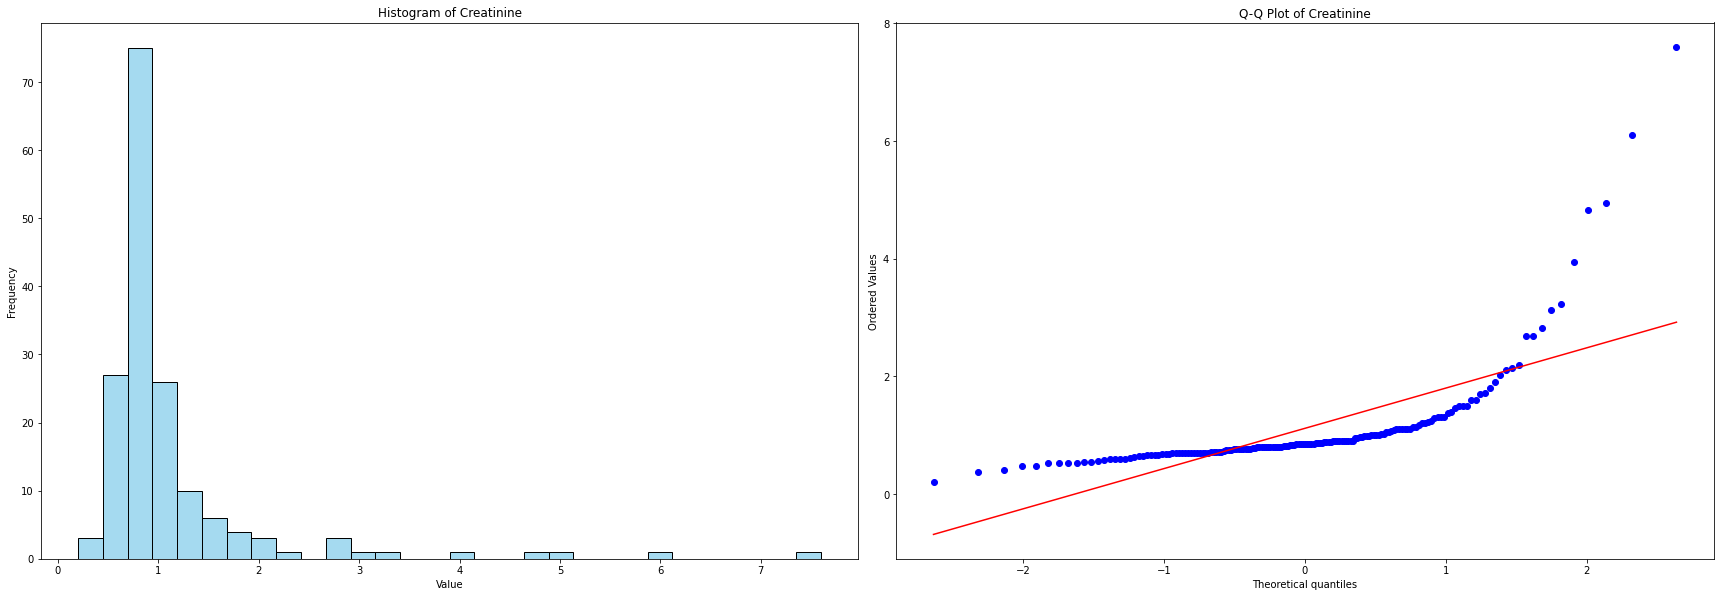

Major_Dim - Shapiro-Wilk Test Statistic: 0.834319531917572
Major_Dim - Shapiro-Wilk p-value: 2.1331309114913655e-12
Major_Dim - Kolmogorov-Smirnov Test Statistic: 0.9470410159415739
Major_Dim - Kolmogorov-Smirnov p-value: 5.637340684580344e-211


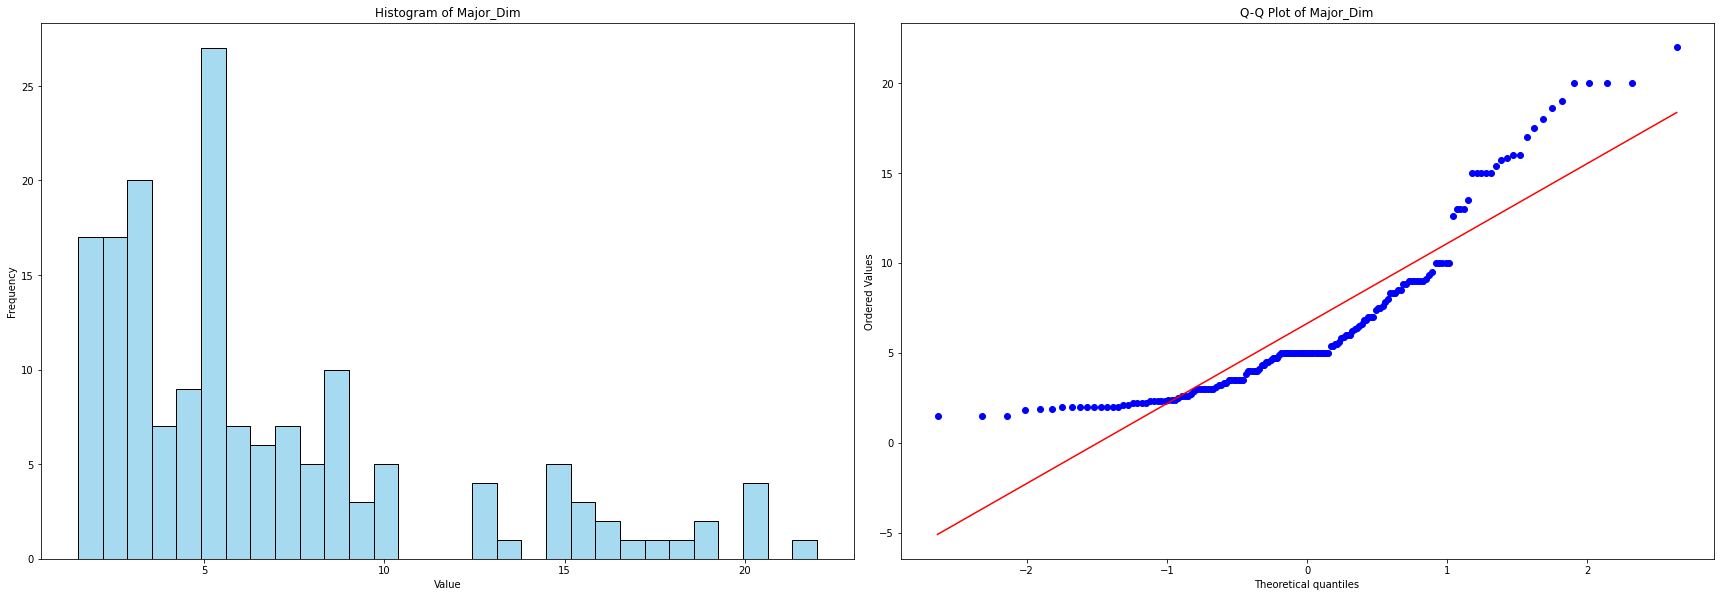

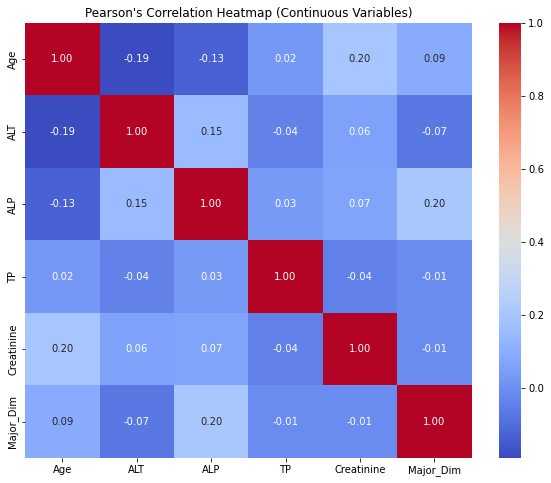

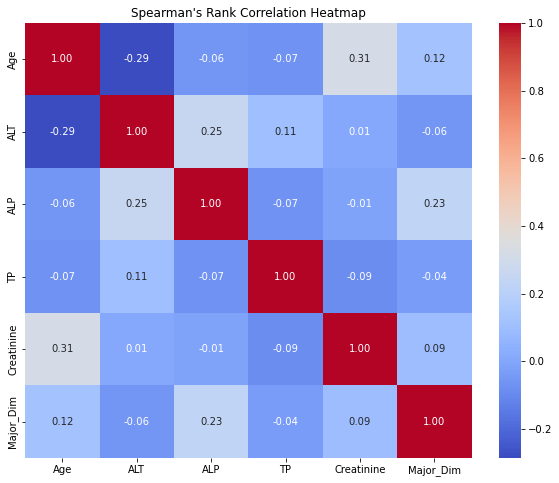

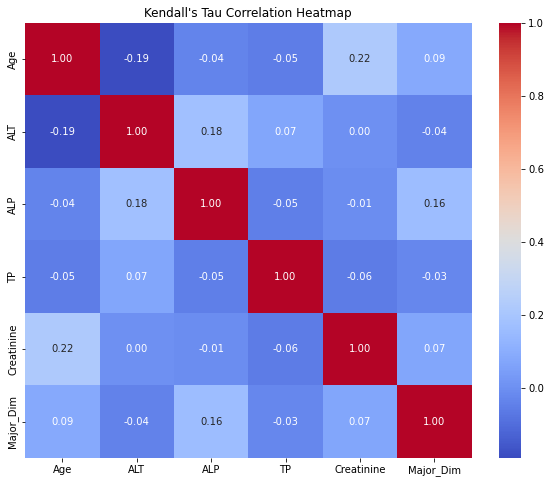

In [699]:
from scipy import stats

# 1. Bar Plot of Outcome
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class', hue='Class', palette='Set1')
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# 2. Histograms of Numeric Variables
numeric_vars = ['Age', 'ALT', 'ALP', 'TP', 'Creatinine', 'Major_Dim']

# 3. Box Plot of Numeric Variables by Outcome
plt.figure(figsize=(12, 6))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Class', hue='Class', y=var, palette='Set2')
    plt.title(f'{var} by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(var)
    plt.yscale('log')
plt.tight_layout()
plt.show()

# 4. Count Plot of Categorical Variables by Outcome
categorical_vars = ['Gender', 'Symptoms', 'Alcohol', 'Smoking']
plt.figure(figsize=(12, 8))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=var, hue='Class', palette='Set1')
    plt.title(f'{var} Count by Outcome')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.yscale('log')
plt.tight_layout()
plt.show()

# 5. Correlation Heatmap
continuous_vars = ['Age', 'ALT', 'ALP', 'TP', 'Creatinine', 'Major_Dim']

# Impute missing values with median
df_continuous = df[continuous_vars].replace('?', np.nan).astype(float)  # Convert '?' to NaN
df_continuous = df_continuous.fillna(df_continuous.median())  # Replace NaN with median

for var in continuous_vars:
    plt.figure(figsize=(24, 16))

    data = df_continuous[var].to_numpy()

    # Plot histogram
    plt.subplot(2,2,1)
    sns.histplot(data, color='skyblue', bins= 20 if var == 'Age' else 30)
    plt.title(f'Histogram of {var}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Plot Q-Q plot
    plt.subplot(2,2,2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')

    # Perform Shapiro-Wilk test
    shapiro_test_stat, shapiro_p_value = stats.shapiro(data)
    print(f"{var} - Shapiro-Wilk Test Statistic: {shapiro_test_stat}")
    print(f"{var} - Shapiro-Wilk p-value: {shapiro_p_value}")

    # Perform Kolmogorov-Smirnov test
    ks_stat, ks_p_value = stats.kstest(data, 'norm')
    print(f"{var} - Kolmogorov-Smirnov Test Statistic: {ks_stat}")
    print(f"{var} - Kolmogorov-Smirnov p-value: {ks_p_value}")

    plt.tight_layout()
    plt.show()

correlation_matrix = df_continuous.corr()

# Plot correlation heatmap - Pearson correlation coefficient
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson's Correlation Heatmap (Continuous Variables)")
plt.show()

# Compute Spearman's rank correlation coefficient
spearman_corr = df_continuous.corr(method='spearman')

# Compute Kendall's tau correlation coefficient
kendall_corr = df_continuous.corr(method='kendall')

# Plot Spearman's correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman's Rank Correlation Heatmap")
plt.show()

# Plot Kendall's tau correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Kendall's Tau Correlation Heatmap")
plt.show()

Here we explored some of the parameters in the dataset, but to preprocess them we need to have a large overview of the data. So let's start preprocessing and we'll see important metrics along the way.

<a id="data-preprocessing"></a>
## Data Preprocessing

As we talked about it before, some of the data included in the data set is not properly set up.
So, let's first map some of the data to a numerical form as stated bellow.

In [700]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_test = df.copy()
mapping = {"Yes": 1, "No": 0, "Male": 0, "Female": 1, "Lives": 1, "Dies": 0}
df.round(decimals = 0)

index = 0
for column in df_test.columns:
    if index > 29: break
    if df_test[column].dtype == 'object' and index <= 23:
        df_test[column] = df_test[column].map(mapping)
    if 27 <= index <= 29:
        df_test[column]=label_encoder.fit_transform(df_test[column])
    index += 1

# change label lives/dies to 1's and 0's
df_test['Class'] = df_test['Class'].map(mapping)
df_test

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,1,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,...,?,?,?,1,1.8,?,?,?,?,1
2,0,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109,7,2.1,5,13,0.1,28,6,16,1
3,0,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,0,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109,6.9,1.8,1,9,?,59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1,0.0,1,NaN,NaN,NaN,1.0,1,0.0,1.0,...,109,7.6,0.7,5,3,?,?,?,?,1
161,1,1.0,0,NaN,NaN,NaN,NaN,1,0.0,0.0,...,280,6.7,0.7,1,2.2,2.3,?,?,?,0
162,0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,181,7.5,1.46,5,18.6,?,?,?,?,1
163,0,0.0,1,1.0,0.0,1.0,1.0,1,1.0,1.0,...,170,8.4,0.74,5,18,?,?,?,?,0


Let's drop some parameters we consider useless based on the information in each column. We'll also drop the 'PS' parameter, because we found that it wasn't information that didn't affect the model's performance and it was a difficult column to work with.

In [701]:
useless = {}
index = 0

# creating a list to see wich columns have the least yes's
for col in df_test.columns:
    if index >= 23: break
    yes_count = (df_test[col] == 1).sum()
    if yes_count <= 10: useless[col] = yes_count 
    index += 1

# creating a list to see wich columns have the most ?'s
for col in df_test.columns:
    count = (df_test[col] == "?").sum()
    if count >= 79: useless[col] = count 
print(useless)
 
# removing useless rows
for index in useless.keys(): df_test = df_test.drop(index, axis=1)

df_test = df_test.drop(columns=['PS'])

{'HBeAg': 1, 'Endemic': 10, 'Hemochro': 7, 'HIV': 3, 'NASH': 8, 'Iron': 79, 'Sat': 80, 'Ferritin': 80}


KNN Inputer

To take care of the missing values of each column, we can use a KNNImputer model (k-nearest neighbour) based on some k value (we'll use 3).

In [702]:
from sklearn.impute import KNNImputer

df_test.replace('?', pd.NA, inplace=True)
df_test = df_test.apply(pd.to_numeric, errors = 'coerce')

knn = KNNImputer(n_neighbors = 3, weights = 'distance')
X = df_test.columns[:30]
df_test[X] = knn.fit_transform(df_test[X]).round(decimals = 0)

X = df_test.columns[30:]

df_test[X] = knn.fit_transform(df_test[X])
df_test

,Gender,Symptoms,Alcohol,HBsAg,HBcAb,HCVAb,Cirrhosis,Smoking,Diabetes,Obesity,...,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Class
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,34.0,41.0,183.0,150.0,7.10,0.700,1.0,3.5,0.500000,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,32.5,32.0,219.0,99.5,7.55,0.915,1.0,1.8,0.250000,1.0
2,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,58.0,68.0,202.0,109.0,7.00,2.100,5.0,13.0,0.100000,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,16.0,64.0,94.0,174.0,8.10,1.110,2.0,15.7,0.200000,0.0
4,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,147.0,306.0,173.0,109.0,6.90,1.800,1.0,9.0,2.026620,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,35.0,40.0,449.0,109.0,7.60,0.700,5.0,3.0,1.800215,1.0
161,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,50.0,91.0,147.0,280.0,6.70,0.700,1.0,2.2,2.300000,0.0
162,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,53.0,52.0,164.0,181.0,7.50,1.460,5.0,18.6,1.095894,1.0
163,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,50.0,60.0,320.0,170.0,8.40,0.740,5.0,18.0,0.630101,0.0


Min-Max Scaler

To make sure all columns have the same weight in the prediction of some patient's input, we can use the Min-Max scale technique on the parameters with continuous values.

In [703]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform it
scaled_values = scaler.fit_transform(df_test)

# Convert the scaled values back to DataFrame
df_clean = pd.DataFrame(scaled_values, columns = df_test.columns)

# Display the scaled DataFrame
print("Scaled DataFrame:")
df_clean = df_clean.round(3)
df_clean

Scaled DataFrame:


,Gender,Symptoms,Alcohol,HBsAg,HBcAb,HCVAb,Cirrhosis,Smoking,Diabetes,Obesity,...,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Class
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.056,0.045,0.103,0.152,0.033,0.068,0.2,0.098,0.014,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.053,0.028,0.126,0.100,0.037,0.097,0.2,0.015,0.005,1.0
2,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.115,0.095,0.115,0.110,0.032,0.257,1.0,0.561,0.000,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.012,0.088,0.046,0.176,0.043,0.123,0.4,0.693,0.003,0.0
4,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.333,0.539,0.097,0.110,0.031,0.216,0.2,0.366,0.066,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.059,0.043,0.274,0.110,0.038,0.068,1.0,0.073,0.058,1.0
161,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.095,0.138,0.080,0.285,0.029,0.068,0.2,0.034,0.075,0.0
162,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.103,0.065,0.091,0.184,0.037,0.170,1.0,0.834,0.034,1.0
163,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.095,0.080,0.191,0.172,0.046,0.073,1.0,0.805,0.018,0.0


With all the data ready, we can now see in a correlation matrix with all the data to select them.

The following code calculates and visualizes the correlation matrix for both continuous and categorical variables in the data frame.
- It defines a function cramers_v to compute Cramér's V statistic for measuring the association between categorical variables. Cramér's V statistic is a measure of association between two categorical variables. It ranges from 0 to 1, where 0 indicates no association and 1 indicates perfect association. It is derived from the chi-squared statistic of a contingency table and adjusts for the table's size.
- For continuous variables, it uses Pearson correlation coefficients. The Pearson correlation coefficient measures the linear relationship between two continuous variables. It ranges from -1 to 1, where -1 indicates a perfect negative linear relationship, 0 indicates no linear relationship, and 1 indicates a perfect positive linear relationship. It is calculated as the covariance of the variables divided by the product of their standard deviations.

It constructs a combined correlation matrix by looping through pairs of columns to apply the appropriate correlation measure (Pearson or Cramér's V). Finally, it visualizes this combined correlation matrix using a heatmap, displaying correlation values with annotations, a color map, and adjustable figure and font sizes for clarity.

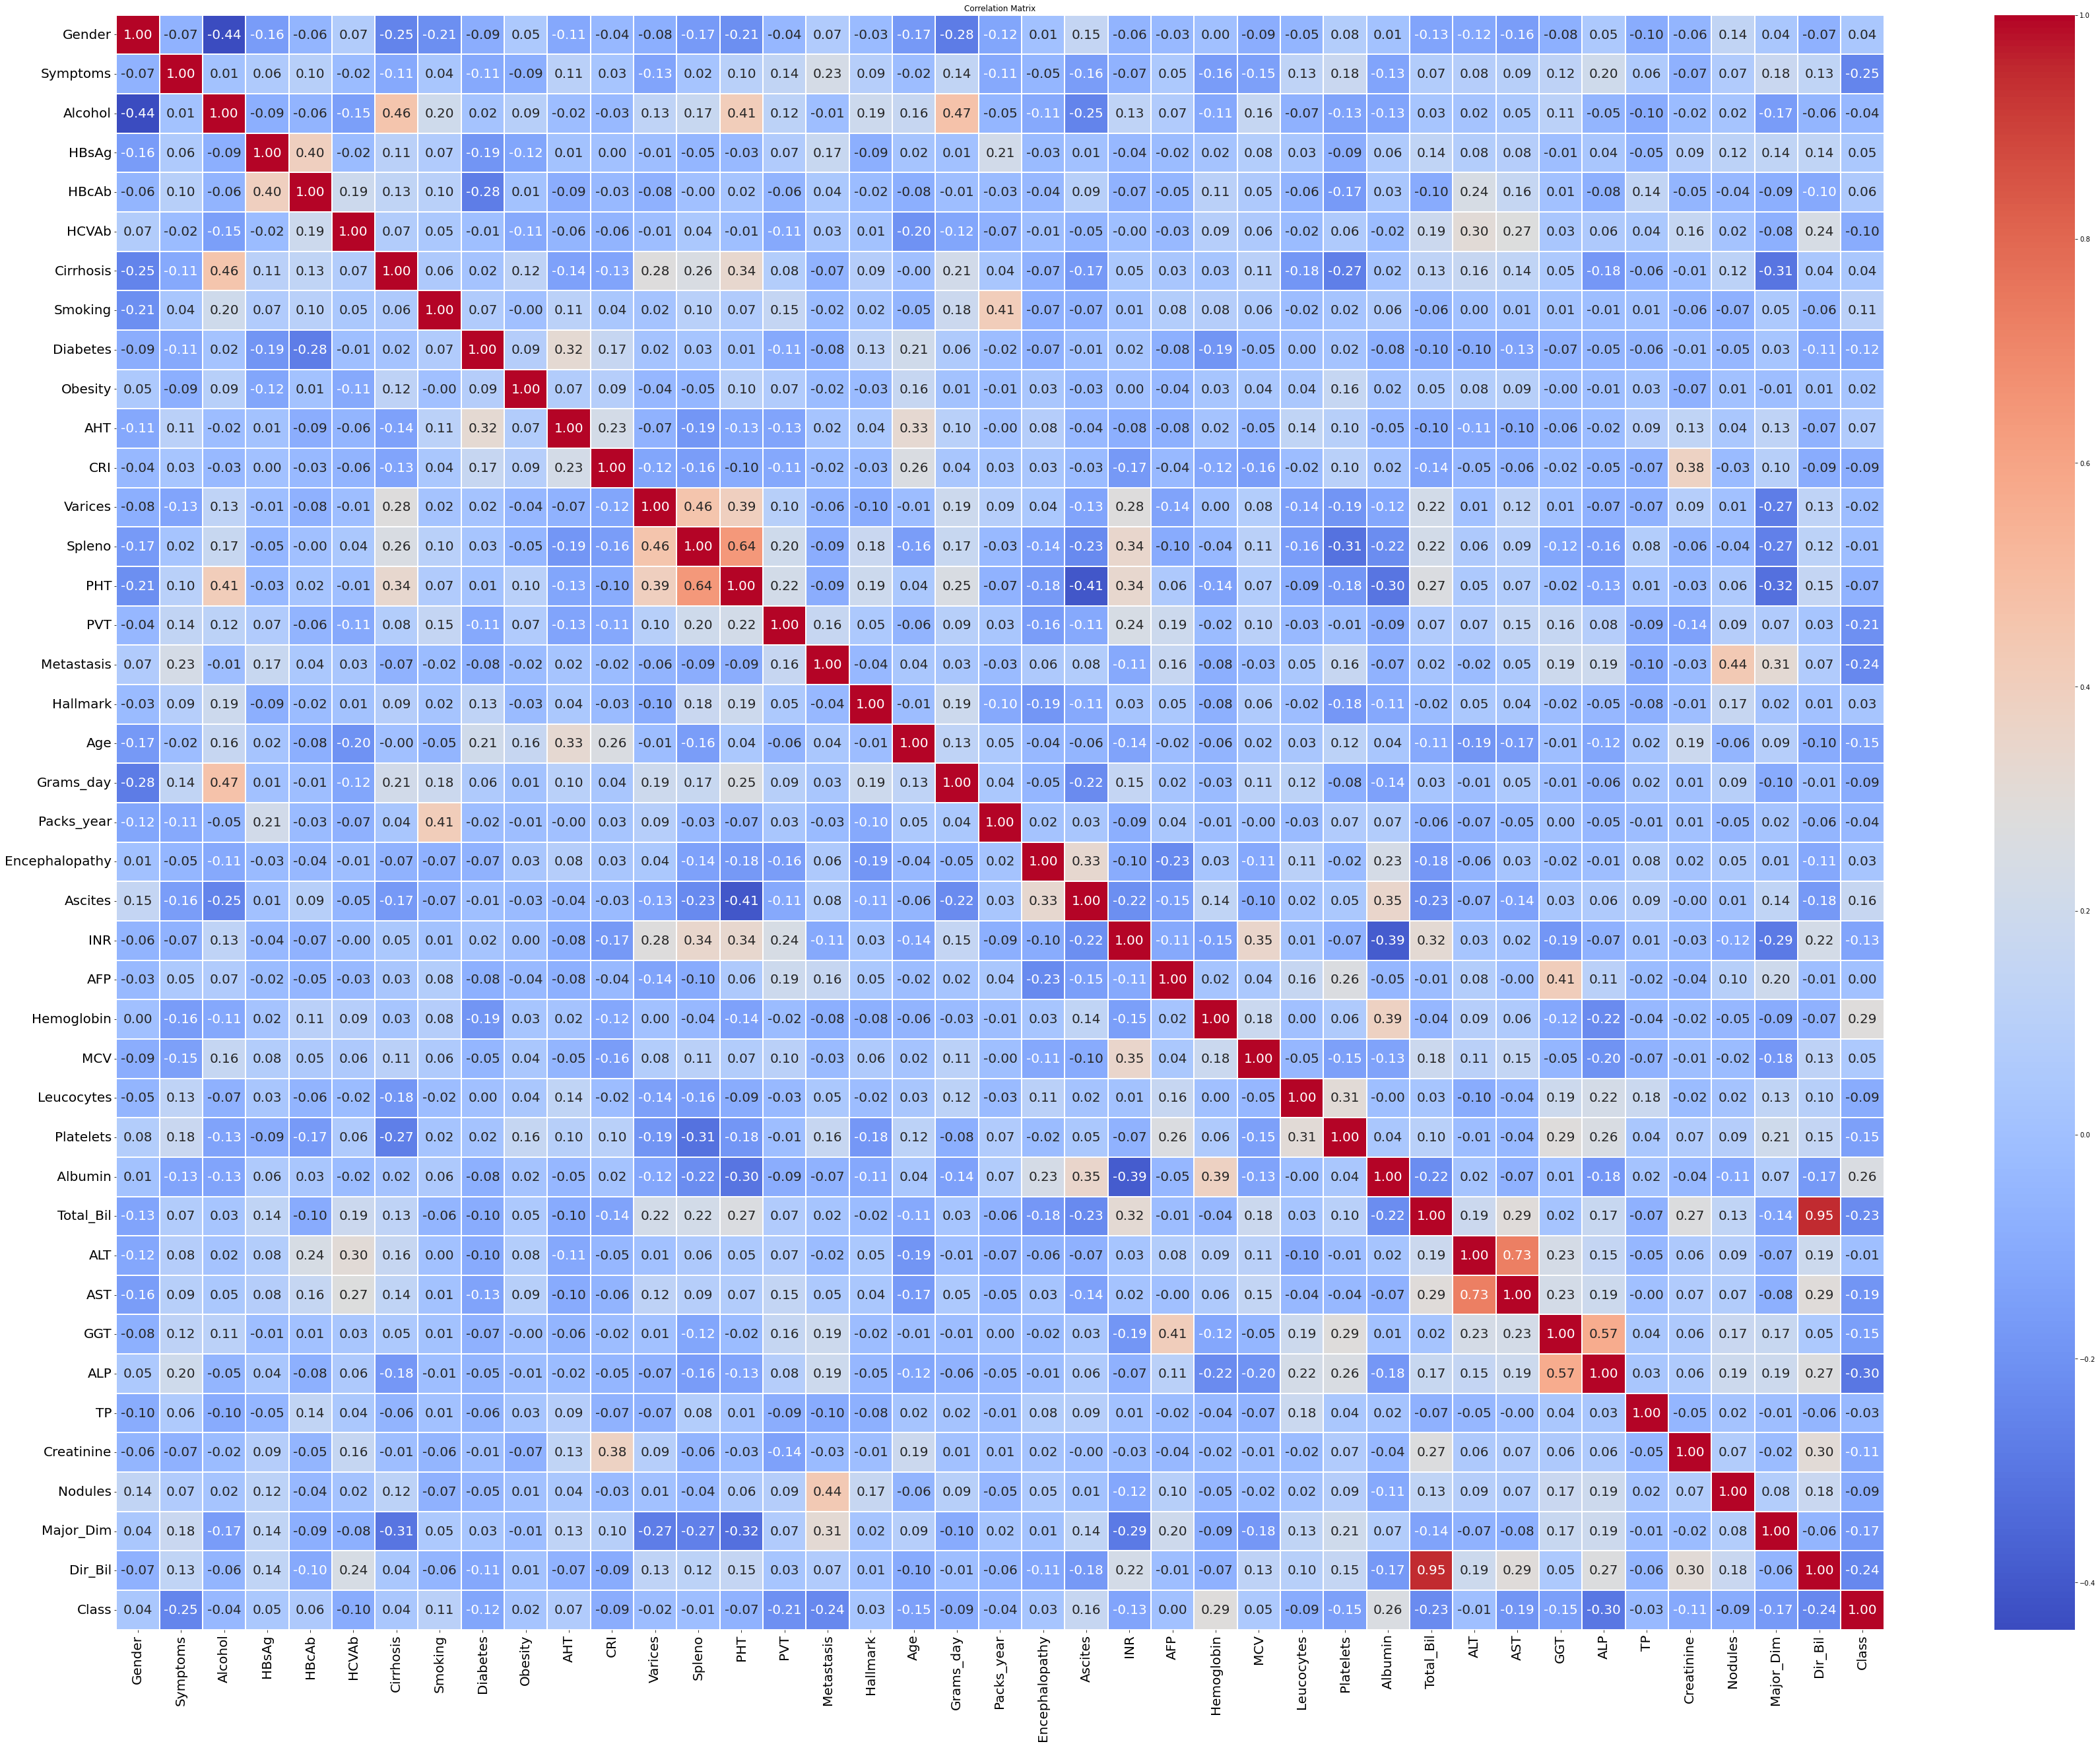

In [704]:
from scipy.stats import chi2_contingency

# Define a function to compute Cramér's V statistic
def cramers_v(x,y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute correlations for continuous variables using Pearson correlation coefficient
continuous_corr = df_clean.corr()

# Compute correlations for categorical variables using Cramér's V statistic
categorical_corr = pd.DataFrame(index=df_clean.columns, columns=df_clean.columns)
for col1 in df_clean.columns:
    for col2 in df_clean.columns:
        if col1 != col2:
            if pd.api.types.is_numeric_dtype(df_clean[col1]) and pd.api.types.is_numeric_dtype(df_clean[col2]):
                categorical_corr.loc[col1, col2] = np.nan
            else:
                categorical_corr.loc[col1, col2] = cramers_v(df_clean[col1], df_clean[col2])

# Combine both correlations into a single DataFrame
correlation_matrix = continuous_corr.combine_first(categorical_corr)

plt.figure(figsize=(60, 45))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2, annot_kws={"size": 20})
plt.title('Correlation Matrix')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Now let's visualize the correlation between each parameter and the outcome of each patient to determine which columns we want to keep and which we don't.

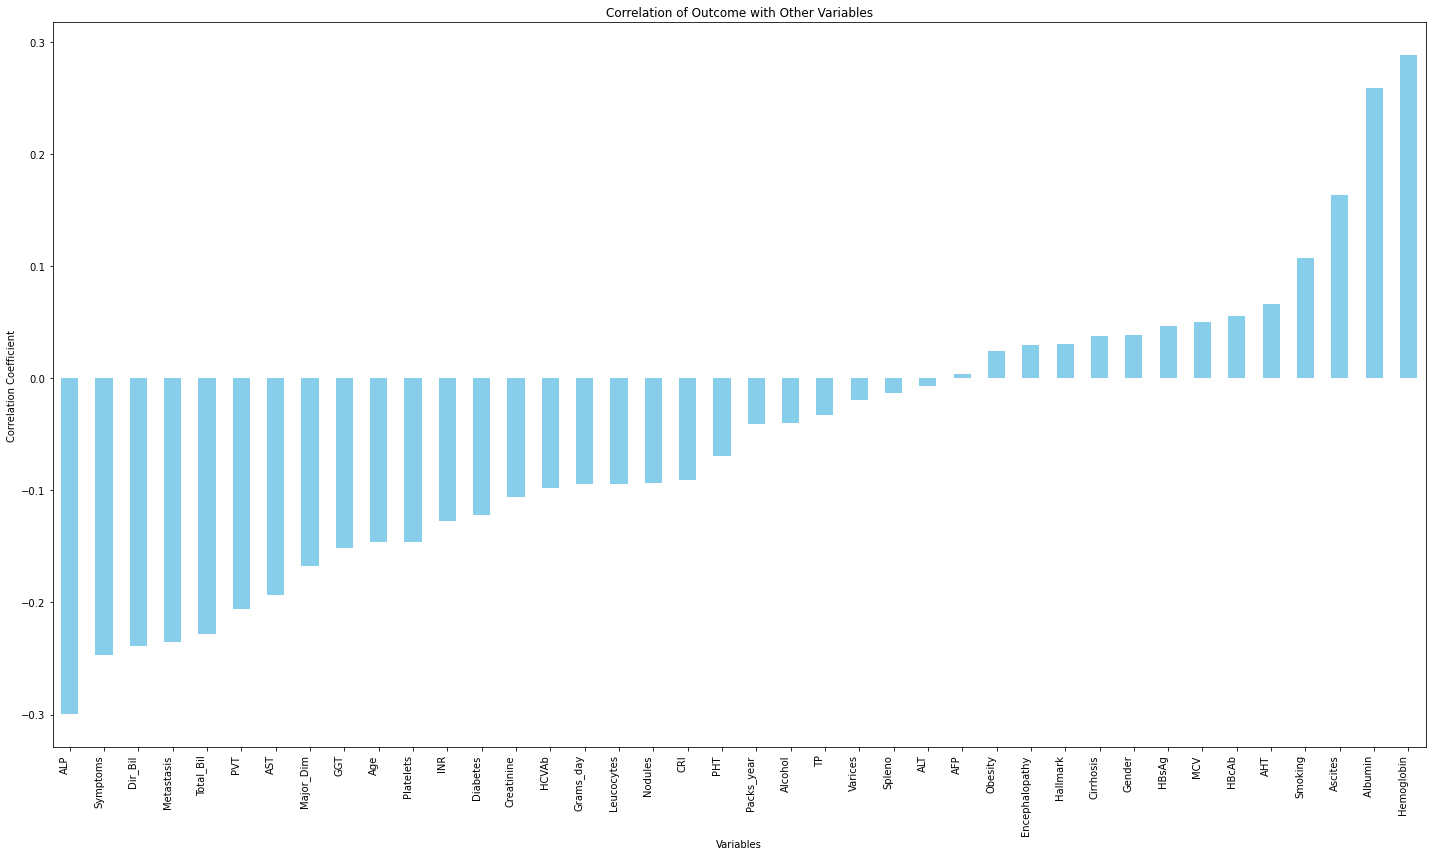

In [705]:
# Extract correlations of the last column (Outcome) with all other columns
outcome_corr = correlation_matrix['Class'].drop('Class').sort_values()

# Plot correlations in a graph
plt.figure(figsize=(20, 12))
outcome_corr.plot(kind='bar', color='skyblue')
plt.title('Correlation of Outcome with Other Variables')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

With this we can determine a threshold in which if the absolute value is less than it, we do not keep that parameter. The following threshold was a value we determined was best.

In [706]:
# Set the threshold for correlation coefficient
threshold = 0.2

# Drop columns with correlation coefficients less than the threshold
columns_to_drop = correlation_matrix.index[correlation_matrix['Class'].abs() < threshold]
df_clean = df_clean.drop(columns_to_drop, axis=1)

# Display the filtered DataFrame
print("Filtered DataFrame:")
df_clean.columns

Filtered DataFrame:


Index(['Symptoms', 'PVT', 'Metastasis', 'Hemoglobin', ' Albumin', 'Total_Bil',
       'ALP', 'Dir_Bil', 'Class'],
      dtype='object')

From the correlation matrix, we notice that 'Total_Bil' and 'Dir_Bil' are highly correlated, because they have a coefficient of 0.95. Therefore, let's drop the one that has the smallest absolute value correlation with the outcome which is 'Total_Bil'.

In [707]:
df_clean = df_clean.drop('Total_Bil', axis=1)
df_clean.columns

Index(['Symptoms', 'PVT', 'Metastasis', 'Hemoglobin', ' Albumin', 'ALP',
       'Dir_Bil', 'Class'],
      dtype='object')

<a id="data-modeling"></a>
# Data Modeling

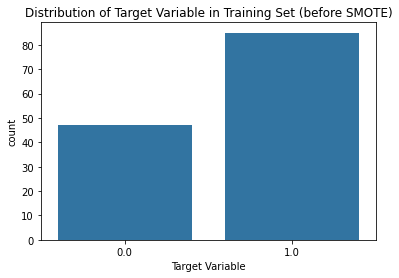

In [708]:

from sklearn.model_selection import train_test_split
train_df_np=df_clean.to_numpy()
X, y = train_df_np[:,:-1], train_df_np[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train_series = pd.Series(y_train)

sns.countplot(x = y_train_series)
plt.xlabel('Target Variable')
plt.title('Distribution of Target Variable in Training Set (before SMOTE)')
plt.show()


SMOTE (Synthetic Minority Over-sampling Technique)

We're going to use this technique to balance out the ratio of "Lives"/"Dies" (1/0) in the training set. 


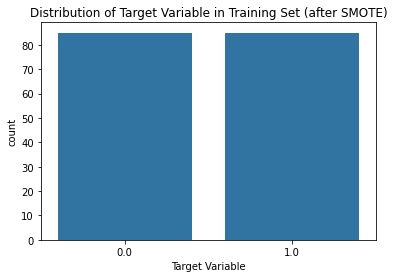

In [709]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 27)
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train)

sns.countplot(x = y_train_series)
plt.xlabel('Target Variable')
plt.title('Distribution of Target Variable in Training Set (after SMOTE)')
plt.show()

# DTC (Decision Tree Classifier)
Next, will test different test sizes to build different DTC models with SMOTE and analyse the results with RMSE (Root Mean Squared Error). We'll then display our top DTC model.

In [710]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import root_mean_squared_error

model = DecisionTreeClassifier()
total_rmse = 0
total_accuracy = 0
accuracies = []

best_model = None
best_accuracy = 0
best_predictions = None
best_y_test = None

for i in range(40):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    y_train_series = pd.Series(y_train)

    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    current_accuracy = accuracy_score(y_test, predictions)
    total_accuracy += current_accuracy
    rmse = root_mean_squared_error(predictions, y_test)
    total_rmse += rmse
    accuracies.append(current_accuracy)
    
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_model = model
        best_predictions = predictions
        best_y_test = y_test

average_accuracy = total_accuracy / 40
average_rmse = total_rmse / 40

print("Top Accuracy:", best_accuracy)
print("RMSE:", average_rmse)
print("Average Accuracy:", average_accuracy)
print("Classification Report of the best model:")
print(classification_report(best_y_test, best_predictions))

Top Accuracy: 0.696969696969697
RMSE: 0.5846743139147166
Average Accuracy: 0.6575757575757577
Classification Report of the best model:
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67        15
         1.0       0.72      0.72      0.72        18

    accuracy                           0.70        33
   macro avg       0.69      0.69      0.69        33
weighted avg       0.70      0.70      0.70        33



Using a Decision Tree Classifier model with SMOTE for handling class imbalance, the top accuracy achieved was about 70%, with an average accuracy across all runs of ~=70% and an RMSE of 0.58. The best model's classification report showed a precision and recall of 0.67 for class 0 and 0.72 for class 1, resulting in an overall accuracy of 0.70, with balanced performance metrics across both classes.

Let's display our top DTC model.

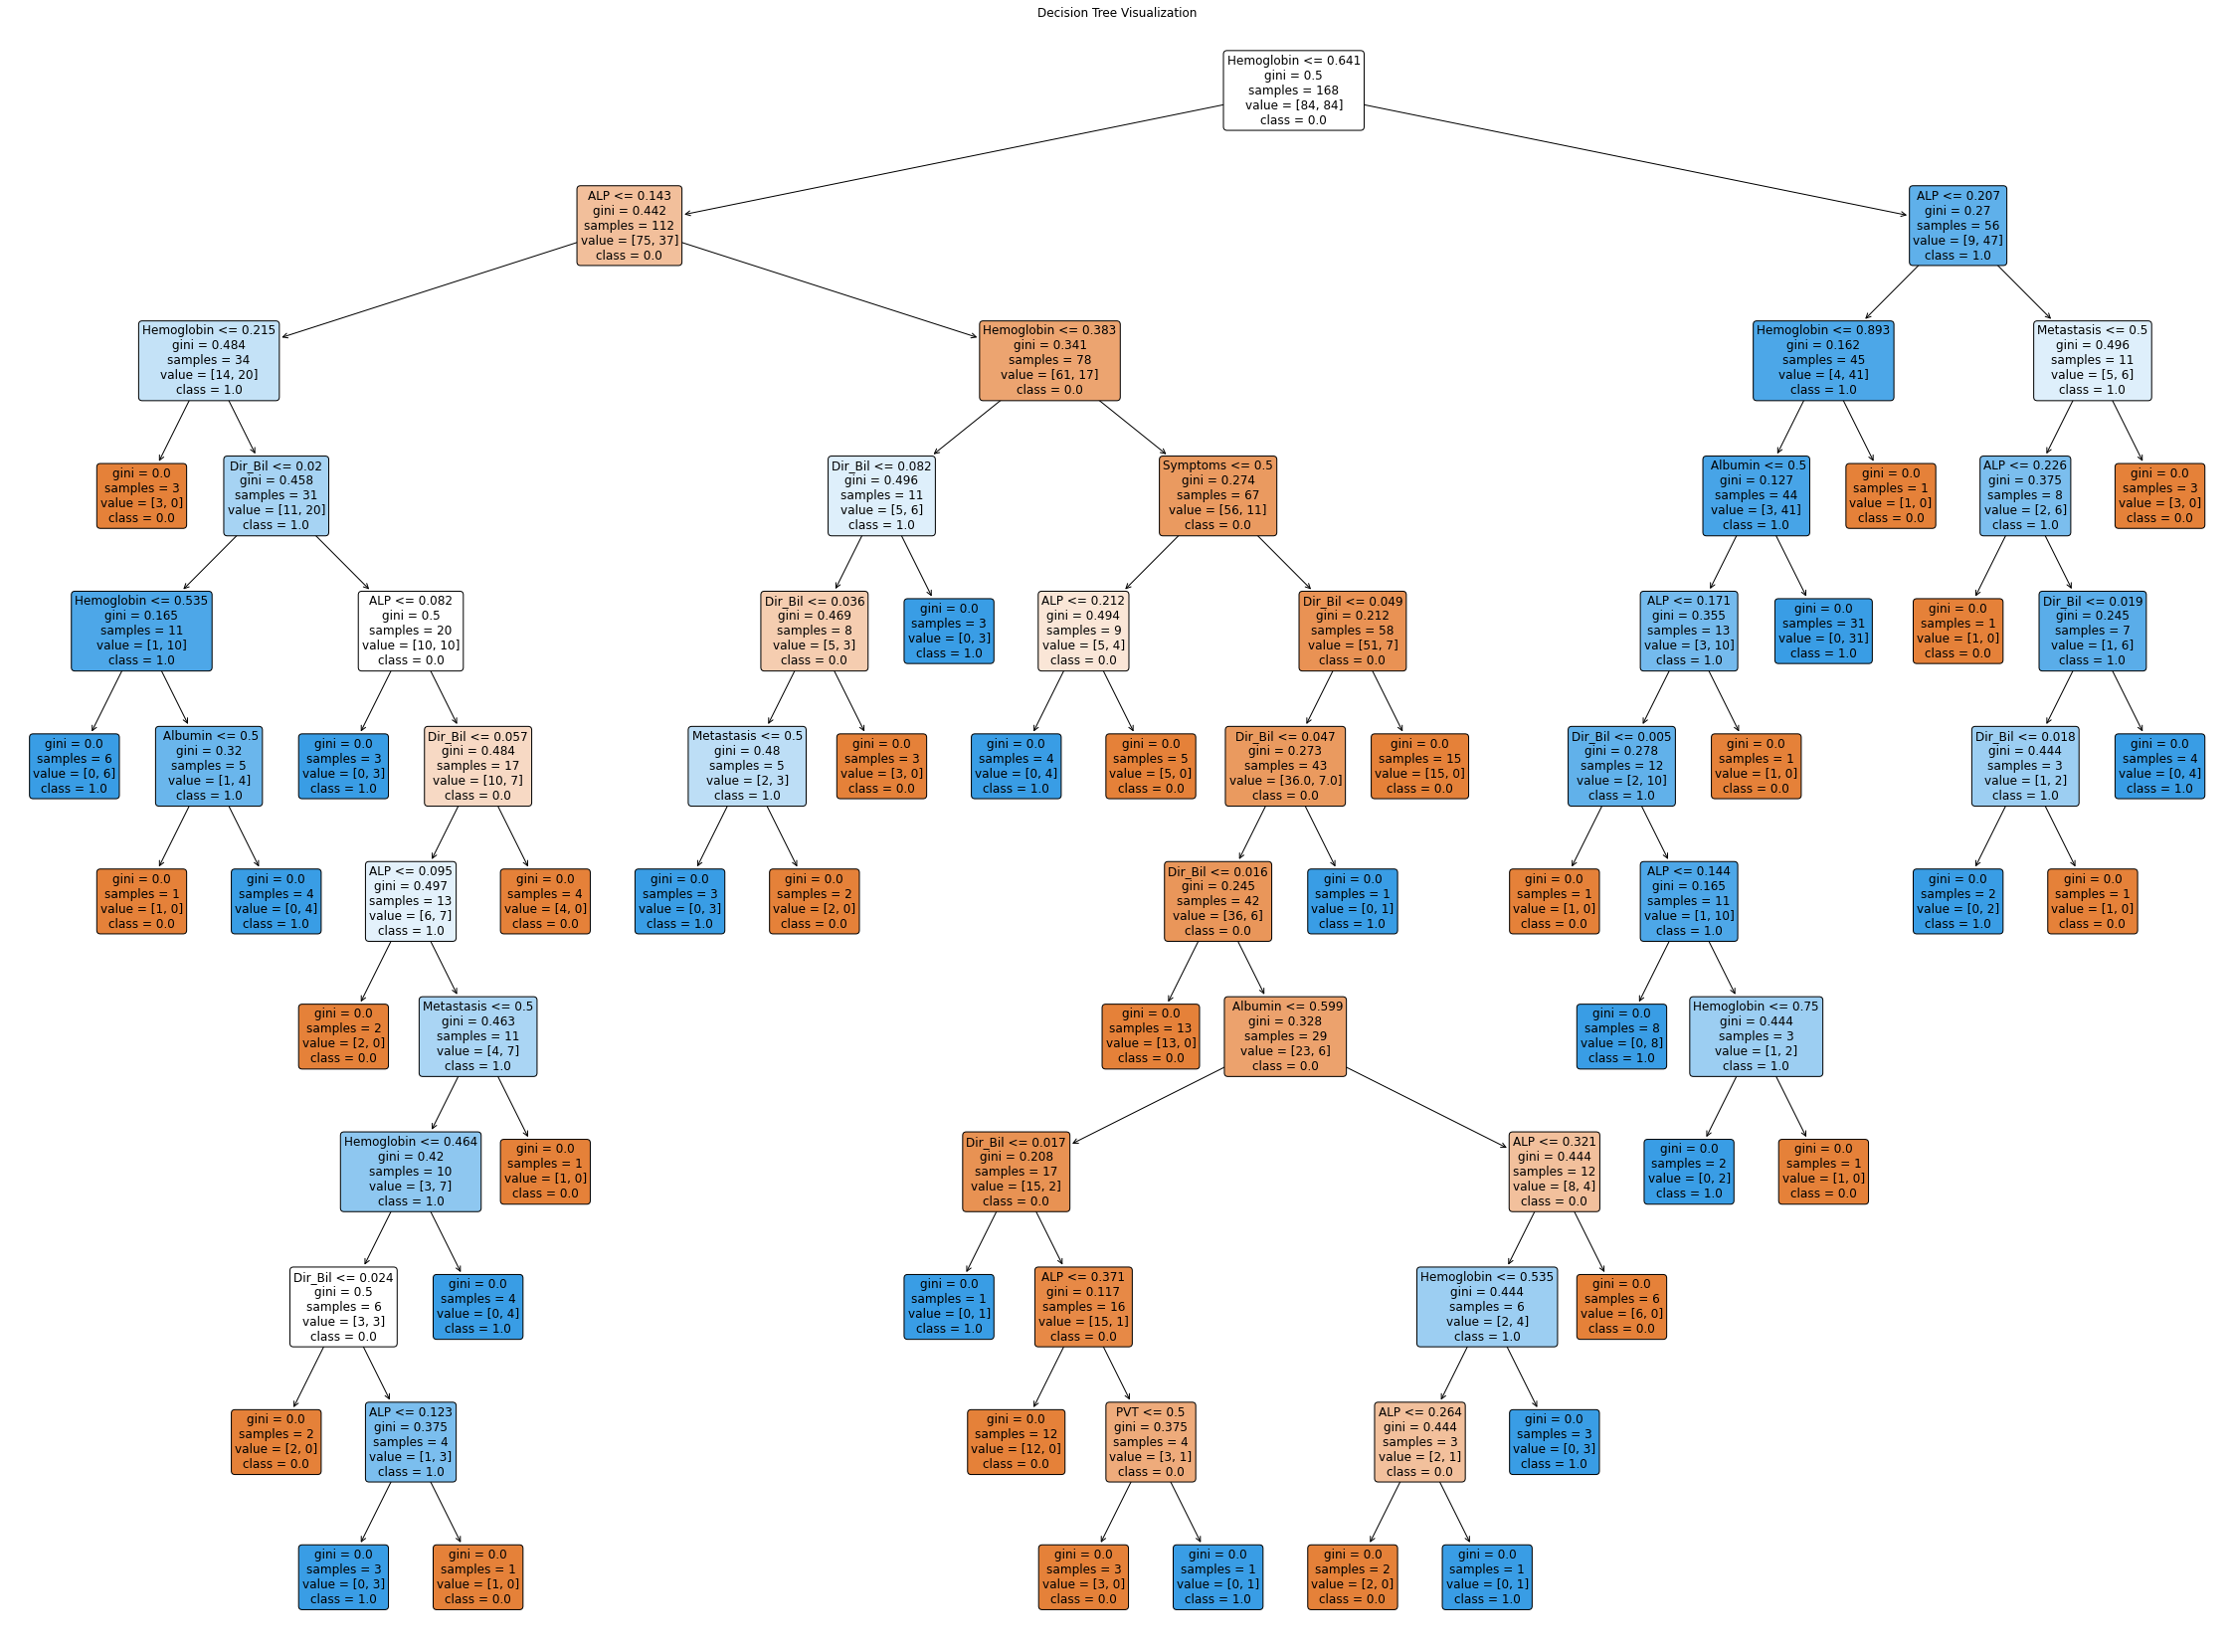

In [711]:
plt.figure(figsize=(40, 30))
plot_tree(
    best_model, 
    filled=True, 
    feature_names=df_clean.columns[:-1].tolist(),  # Convert Index to list
    class_names=np.unique(y).astype(str).tolist(),  # Convert array to list
    rounded=True, 
    fontsize=12
)
plt.title('Decision Tree Visualization')
plt.show()

Evaluation of Decision Tree Classifier Using K-Fold Cross-Validation

In [712]:
from sklearn.model_selection import StratifiedKFold


model = DecisionTreeClassifier()
smote = SMOTE(random_state=42)

k = 5 # Number of folds
n_repeats = 40  # Number of repeats
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

accuracies = []
best_model = None
best_accuracy = 0
best_predictions = None
best_y_test = None

for repeat in range(n_repeats):
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Apply SMOTE on the training data
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        y_train_series = pd.Series(y_train_resampled)

        model.fit(X_train_resampled, y_train_resampled)
        predictions = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_predictions = predictions
            best_y_test = y_test

# Calculate the average accuracy and standard deviation
average_accuracy = np.mean(accuracies)
std_deviation = np.std(accuracies)

print("Classification Report:")
print(classification_report(best_y_test, best_predictions))

print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Deviation of Accuracy: {std_deviation}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.92      0.81        12
         1.0       0.94      0.81      0.87        21

    accuracy                           0.85        33
   macro avg       0.84      0.86      0.84        33
weighted avg       0.87      0.85      0.85        33

Average Accuracy: 0.686060606060606
Standard Deviation of Accuracy: 0.07266664139307569


Using K-Fold Cross-Validation with a Decision Tree Classifier (DTC) and SMOTE for class imbalance, the model achieved an average accuracy of 0.68 with a standard deviation of 0.07, indicating consistent performance across folds. The classification report for the best model shows a precision of 0.73 and recall of 0.92 for class 0, and a precision of 0.94 and recall of 0.81 for class 1, resulting in an overall accuracy of 0.85. These results suggest that the model performs well, particularly in identifying the minority class, with balanced precision and recall metrics across both classes.

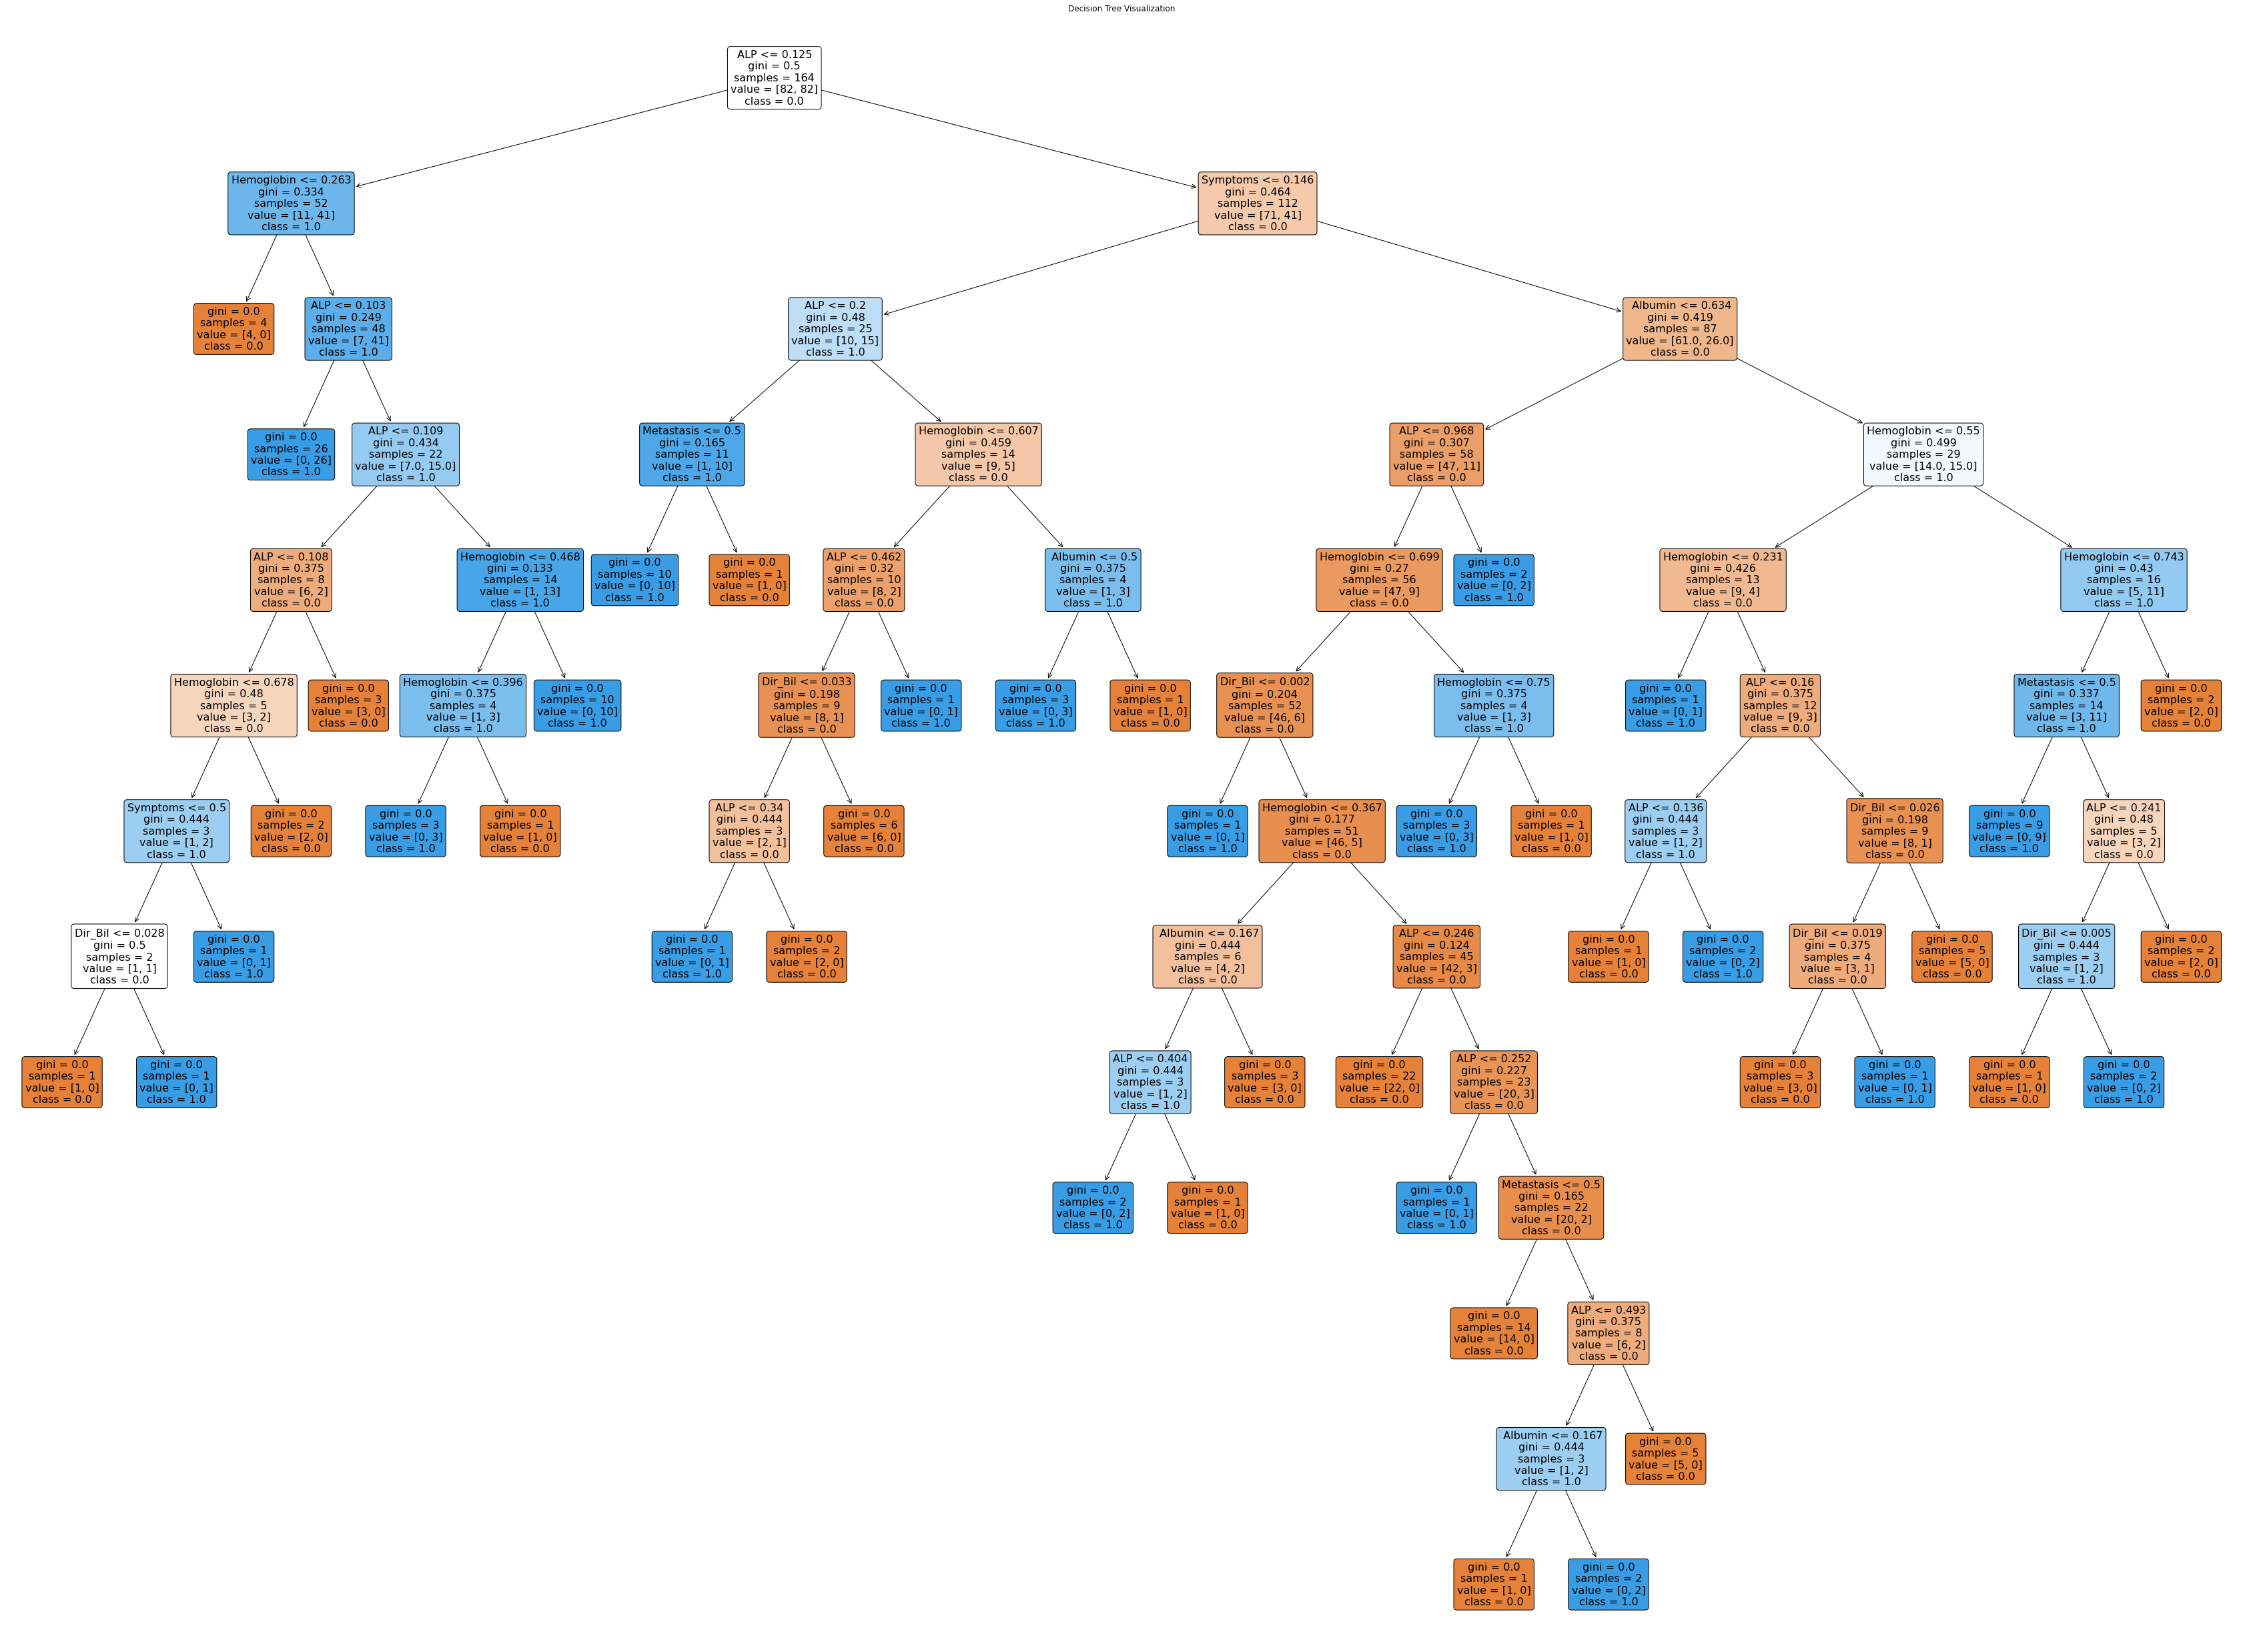

In [713]:
plt.figure(figsize = (60, 45))
plot_tree(
    best_model, 
    filled = True, 
    feature_names = df_clean.columns[:-1].tolist(),
    class_names = np.unique(y).astype(str).tolist(),
    rounded = True, 
    fontsize = 16
)
plt.title('Decision Tree Visualization')
plt.show()

# KNN (K Nearest Neighbor)
After watching the performance of DTC models on the data frame, let's see how does KNN perform.

In [714]:
from sklearn.neighbors import KNeighborsClassifier
k = 8
knn = KNeighborsClassifier(n_neighbors = k)

As we did with DTC, we'll iterate 40 times and see the average accuracy and the top model.

In [715]:
knn_accuracy = 0
accuracies = []

best_model = None
best_accuracy = 0
best_predictions = None
best_y_test = None

for i in range(40):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=47)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    y_train_series = pd.Series(y_train)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracy += accuracy
    accuracies.append(accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_predictions = y_pred
        best_y_test = y_test

top_accuracy = sorted(accuracies, reverse=True)[:1]
print("Top Accuracies:", top_accuracy)
print("Best Classification Report:")
print(classification_report(best_y_test, best_predictions))

knn_accuracy = knn_accuracy / 40
print("Accuracy:", knn_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Top Accuracies: [0.6767676767676768]
Best Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.63      0.60        38
         1.0       0.75      0.70      0.73        61

    accuracy                           0.68        99
   macro avg       0.66      0.67      0.66        99
weighted avg       0.68      0.68      0.68        99

Accuracy: 0.6767676767676772
Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.63      0.60        38
         1.0       0.75      0.70      0.73        61

    accuracy                           0.68        99
   macro avg       0.66      0.67      0.66        99
weighted avg       0.68      0.68      0.68        99



The models achieved a top accuracy of approximately 68%, which doesn't change much from the average. The classification report shows a precision of 0.57 and recall of 0.63 for class 0, and a precision of 0.75 and recall of 0.70 for class 1, leading to an overall accuracy of 68%. These results suggest that while the KNN model performs moderately well, there is room for improvement in handling the minority class.

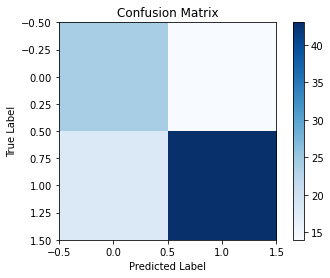

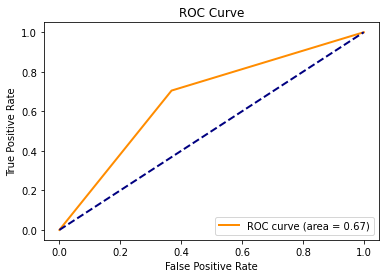

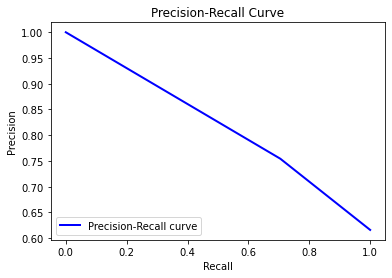

In [716]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

KNN's Evaluation Using K-Fold Cross-Validation

In [717]:

model = KNeighborsClassifier(n_neighbors = k)
smote = SMOTE(random_state=42)

k = 5 # Number of folds
n_repeats = 40  # Number of repeats
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

accuracies = []

best_model = None
best_accuracy = 0
best_predictions = None
best_y_test = None

for repeat in range(n_repeats):
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_predictions = predictions
        best_y_test = y_test
            
print("Best Classification Report:")
print(classification_report(best_y_test, best_predictions))

average_accuracy = np.mean(accuracies)
std_deviation = np.std(accuracies)

print(f"Average Accuracy: {average_accuracy}")
print(f"Standard Deviation of Accuracy: {std_deviation}"0.46)

Best Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.46      0.55        13
         1.0       0.71      0.85      0.77        20

    accuracy                           0.70        33
   macro avg       0.69      0.66      0.66        33
weighted avg       0.69      0.70      0.68        33

Average Accuracy: 0.7090909090909092
Standard Deviation of Accuracy: 0.030903148567229


The models' evaluation using K-Fold resulted in an average accuracy of 0.7091 with a standard deviation of 0.0309, indicating consistent performance across folds. The classification report shows a precision of 0.67 and recall of 0.46 for class 0, and a precision of 0.71 and recall of 0.85 for class 1, leading to an overall accuracy of 0.70. These results suggest that the KNN model performs well, especially in identifying the majority class, but still has room for improvement in handling the minority class, as we have seen before.

KNN Prediting the Train Values with SMOTE

In [718]:
knn_accuracy = 0

best_model = None
best_accuracy = 0
best_predictions = None
best_y_train = None

for i in range(40):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=47)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    y_train_series = pd.Series(y_train)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    knn_accuracy += accuracy

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_predictions = y_pred
        best_y_train = y_train

knn_accuracy = knn_accuracy/40
print("Accuracy:", knn_accuracy)
print("Best Classification Report:")
print(classification_report(best_y_train, best_predictions))

Accuracy: 0.8048780487804879
Best Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82        41
         1.0       0.86      0.73      0.79        41

    accuracy                           0.80        82
   macro avg       0.81      0.80      0.80        82
weighted avg       0.81      0.80      0.80        82



This classification report indicates a strong performance of the KNN models with SMOTE. The precision was about 0.77, the recall 0.88 for class 0, and a precision of 0.86 and recall of 0.73 for class 1. The overall accuracy is 0.80, with both macro and weighted averages of precision, recall, and F1-score around 0.82. These results demonstrate that the KNN model performs well on the balanced training dataset, effectively identifying both classes with good precision and recall metrics.

Let's display now how they perform overall with different test sizes.

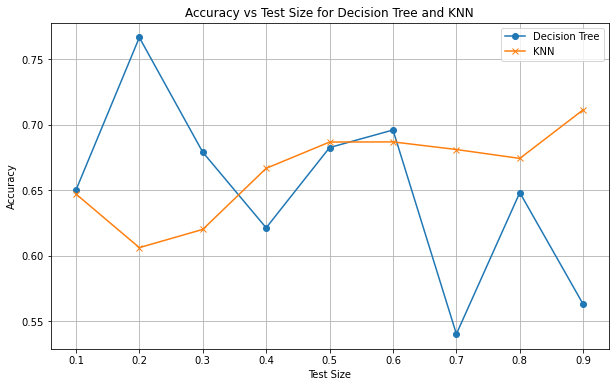

In [719]:
train_df_np = df_clean.to_numpy()
X, y = train_df_np[:, :-1], train_df_np[:, -1]

test_sizes = np.linspace(0.1, 0.9, 9)

dt_accuracies = []
knn_accuracies = []

dt_model = DecisionTreeClassifier()
k = 3   

for test_size in test_sizes:
    dt_accuracy = 0
    knn_accuracy = 0
    for _ in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=47)
        
        # Decision Tree
        sm = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
        dt_model.fit(X_train_resampled, y_train_resampled)
        dt_predictions = dt_model.predict(X_test)
        dt_accuracy += accuracy_score(y_test, dt_predictions)
        
        # KNN
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, y_train)
        knn_predictions = knn_model.predict(X_test)
        knn_accuracy += accuracy_score(y_test, knn_predictions)
    
    dt_accuracies.append(dt_accuracy / 20)
    knn_accuracies.append(knn_accuracy / 20)
80
results_df = pd.DataFrame({
    'Test Size': test_sizes,
    'Decision Tree Accuracy': dt_accuracies,
    'KNN Accuracy': knn_accuracies
})

plt.figure(figsize=(10, 6))
plt.plot(results_df.to_numpy()[:, 0], results_df.to_numpy()[:, 1], marker='o', label='Decision Tree')
plt.plot(results_df.to_numpy()[:, 0], results_df.to_numpy()[:, 2], marker='x', label='KNN')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Test Size for Decision Tree and KNN')
plt.legend()
plt.grid(True)
plt.show()

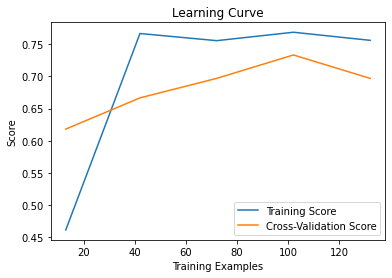

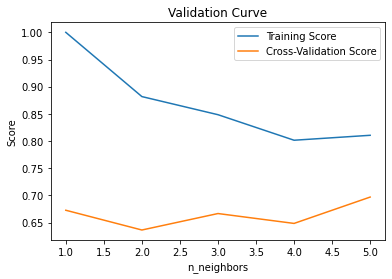

In [720]:
from sklearn.model_selection import validation_curve

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(knn, X, y)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Validation Curves
param_range = [1, 2, 3, 4, 5]
train_scores, test_scores = validation_curve(knn, X, y, param_name='n_neighbors', param_range=param_range)
plt.plot(param_range, train_scores.mean(axis=1), label='Training Score')
plt.plot(param_range, test_scores.mean(axis=1), label='Cross-Validation Score')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [721]:
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold

# Split the data into features and target
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# Holdout Method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
holdout_accuracy = accuracy_score(y_test, y_pred)
print(f'Holdout Method Accuracy: {holdout_accuracy:.2f}')

# K-Fold Cross-Validation
k = 5
cv_scores = cross_val_score(knn, X, y, cv=k)
print(f'{k}-Fold Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()
loo_scores = cross_val_score(knn, X, y, cv=loo)
print(f'Leave-One-Out Cross-Validation Accuracy: {loo_scores.mean():.2f}')

# Summary of results
print(f"\nSummary of Partitioning Methods:")
print(f"Holdout Method Accuracy: {holdout_accuracy:.2f}")
print(f"{k}-Fold Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
print(f"Leave-One-Out Cross-Validation Accuracy: {loo_scores.mean():.2f}")

Holdout Method Accuracy: 0.55
5-Fold Cross-Validation Accuracy: 0.67 ± 0.08
Leave-One-Out Cross-Validation Accuracy: 0.66

Summary of Partitioning Methods:
Holdout Method Accuracy: 0.55
5-Fold Cross-Validation Accuracy: 0.67 ± 0.08
Leave-One-Out Cross-Validation Accuracy: 0.66


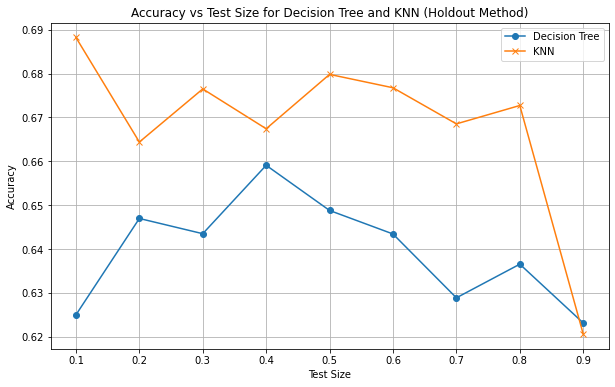

5-Fold Cross-Validation Accuracy for Decision Tree: 0.65 ± 0.05
5-Fold Cross-Validation Accuracy for KNN: 0.66 ± 0.07
Leave-One-Out Cross-Validation Accuracy for Decision Tree: 0.69
Leave-One-Out Cross-Validation Accuracy for KNN: 0.66


In [722]:

train_df_np = df_clean.to_numpy()
X, y = train_df_np[:, :-1], train_df_np[:, -1]

test_sizes = np.linspace(0.1, 0.9, 9)

dt_accuracies = []
knn_accuracies = []

dt_model = DecisionTreeClassifier()
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)

for test_size in test_sizes:
    dt_accuracy = 0
    knn_accuracy = 0
    for _ in range(40):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        
        # Decision Tree
        dt_model.fit(X_train, y_train)
        dt_predictions = dt_model.predict(X_test)
        dt_accuracy += accuracy_score(y_test, dt_predictions)
        
        # KNN
        knn_model.fit(X_train, y_train)
        knn_predictions = knn_model.predict(X_test)
        knn_accuracy += accuracy_score(y_test, knn_predictions)
    
    dt_accuracies.append(dt_accuracy / 40)
    knn_accuracies.append(knn_accuracy / 40)

results_df = pd.DataFrame({
    'Test Size': test_sizes,
    'Decision Tree Accuracy': dt_accuracies,
    'KNN Accuracy': knn_accuracies
})

plt.figure(figsize=(10, 6))
plt.plot(results_df.to_numpy()[:, 0], results_df.to_numpy()[:, 1], marker='o', label='Decision Tree')
plt.plot(results_df.to_numpy()[:, 0], results_df.to_numpy()[:, 2], marker='x', label='KNN')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Test Size for Decision Tree and KNN (Holdout Method)')
plt.legend()
plt.grid(True)
plt.show()

# K-Fold Cross-Validation
k_fold = 5
kf = KFold(n_splits=k_fold)
dt_cv_scores = cross_val_score(dt_model, X, y, cv=kf)
knn_cv_scores = cross_val_score(knn_model, X, y, cv=kf)

print(f'{k_fold}-Fold Cross-Validation Accuracy for Decision Tree: {dt_cv_scores.mean():.2f} ± {dt_cv_scores.std():.2f}')
print(f'{k_fold}-Fold Cross-Validation Accuracy for KNN: {knn_cv_scores.mean():.2f} ± {knn_cv_scores.std():.2f}')

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()
dt_loo_scores = cross_val_score(dt_model, X, y, cv=loo)
knn_loo_scores = cross_val_score(knn_model, X, y, cv=loo)

print(f'Leave-One-Out Cross-Validation Accuracy for Decision Tree: {dt_loo_scores.mean():.2f}')
print(f'Leave-One-Out Cross-Validation Accuracy for KNN: {knn_loo_scores.mean():.2f}')

# [Conclusion](#conclusion)

In this project, we aimed to predict the 1-year survivability of patients diagnosed with Hepatocellular Carcinoma (HCC) using the dataset from Coimbra Hospital and University Center (CHUC). Our structured approach involved comprehensive data exploration, preprocessing, feature engineering, and the application of supervised learning models, specifically Decision Trees and K-Nearest Neighbors (KNN).

We addressed the class imbalance issue by employing SMOTE, which led to notable improvements in model performance. The Decision Tree Classifier, evaluated with K-Fold Cross-Validation, achieved an average accuracy of aprox. 0.69 with a standard deviation of 0.0668, demonstrating balanced precision and recall metrics across both classes.

Similarly, the KNN classifier, with and without K-Fold, but with SMOTE, exhibited promising results. Without K-Fold, it achieved an overall accuracy of aprox. 0.68, while with K-Fold, it attained a higher accuracy of aprox. 0.71 with a standard deviation of 0.0309, indicating the effectiveness of K-Fold in data modeling.

The best-performing model DTC/KNN, with SMOTE and K-Fold, demonstrated strong performance with a precision of 073/0.67 and recall of 0.92/0.46 for class 0, and a precision of 0.94/0.71 and recall of 0.81/0.85 for class 1, respectively. This translated to an overall accuracy of 0.85/0.70, showcasing the model's ability to effectively distinguish between patients likely to survive and those who are not.

In conclusion, our machine learning pipeline successfully utilized clinical data to make accurate predictions about patient survivability, providing a valuable tool for medical professionals. Future work could focus on integrating additional features, exploring more advanced machine learning algorithms, and further refining the models to enhance predictive accuracy and clinical applicability.